In [1]:
import corner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
apsup = pd.read_csv('/Users/afw2/BASTA/Paper1/data/gaia_phs_tm_ap_supp.csv')

/Users/afw2/.conda/envs/Galpy_first_look/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (705) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


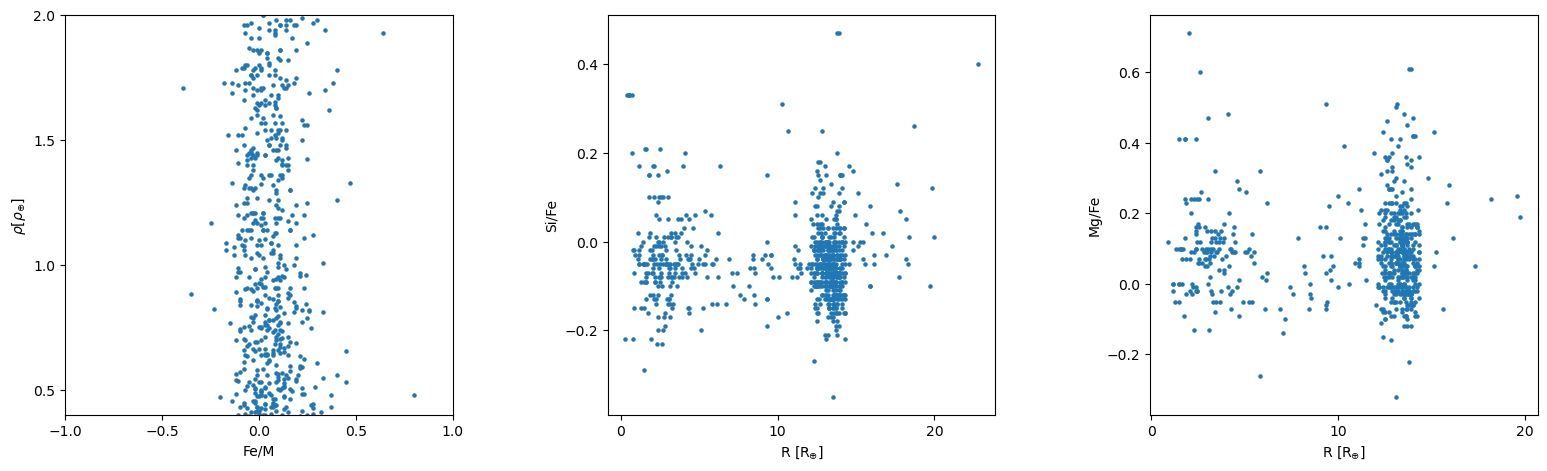

In [3]:
cols =3
s=5

fig, ax = plt.subplots(ncols=cols, figsize=(19,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)

plt.rcParams.update({'font.size': 22})

ax[0].scatter(apsup['alphafe_gspspec'], apsup['pl_dens'], s=s)
ax[0].set_ylabel(r'$\rho$[$\rho$$_{\oplus}$]')
ax[0].set_xlabel('Fe/M')
ax[0].set_xlim(-1,1)
ax[0].set_ylim(0.4,2)

ax[1].scatter(apsup['pl_rade'], apsup['sife_gspspec'], s=s)
ax[1].set_xlabel(r'R [R$_{\oplus}$]')
ax[1].set_ylabel('Si/Fe')

ax[2].scatter(apsup['pl_rade'], apsup['mgfe_gspspec'], s=s)
ax[2].set_xlabel(r'R [R$_{\oplus}$]')
ax[2].set_ylabel('Mg/Fe')

#for i in range(0,cols):
    #ax[i].set_xlim(0,4)


plt.show()

In [4]:
msc = pd.read_csv('/Users/afw2/BASTA/Paper1/output/gaia_spec/results.ascii', delim_whitespace=True)
gsp = pd.read_csv('/Users/afw2/BASTA/Paper1/output/gaia_spec_gsp/results.ascii', delim_whitespace=True)
#gspphot = pd.read_csv('/Users/afw2/BASTA/Paper1/output/gaia_phot/results.ascii', delim_whitespace=True)
sc = pd.read_csv('/Users/afw2/BASTA/Paper1/output/sc/results.ascii', delim_whitespace=True)
nasa = pd.read_csv('/Users/afw2/BASTA/Paper1/output/nasa/results.ascii', delim_whitespace=True)
orig = pd.read_csv('/Users/afw2/BASTA/Paper1/data/gaia_phs_tm_ap_supp.csv')
d = pd.merge(gsp, msc, on='#starid', suffixes = ['_gsp', '_msc'])
f = pd.merge(sc, nasa, on='#starid', suffixes=['_sc', '_nasa'])
out = pd.merge(d, f, on='#starid', suffixes=[None, None])
out.keys()

Index(['#starid', 'distance_gsp', 'distance_errm_gsp', 'distance_errp_gsp',
       'Teff_gsp', 'Teff_errm_gsp', 'Teff_errp_gsp', 'FeH_gsp', 'FeH_errm_gsp',
       'FeH_errp_gsp', 'radPhot_gsp', 'radPhot_errm_gsp', 'radPhot_errp_gsp',
       'massfin_gsp', 'massfin_errm_gsp', 'massfin_errp_gsp', 'age_gsp',
       'age_errm_gsp', 'age_errp_gsp', 'distance_msc', 'distance_errm_msc',
       'distance_errp_msc', 'Teff_msc', 'Teff_errm_msc', 'Teff_errp_msc',
       'FeH_msc', 'FeH_errm_msc', 'FeH_errp_msc', 'radPhot_msc',
       'radPhot_errm_msc', 'radPhot_errp_msc', 'massfin_msc',
       'massfin_errm_msc', 'massfin_errp_msc', 'age_msc', 'age_errm_msc',
       'age_errp_msc', 'distance_sc', 'distance_errm_sc', 'distance_errp_sc',
       'Teff_sc', 'Teff_errm_sc', 'Teff_errp_sc', 'FeH_sc', 'FeH_errm_sc',
       'FeH_errp_sc', 'radPhot_sc', 'radPhot_errm_sc', 'radPhot_errp_sc',
       'massfin_sc', 'massfin_errm_sc', 'massfin_errp_sc', 'age_sc',
       'age_errm_sc', 'age_errp_sc', 'distance

In [5]:
full = pd.merge(out, apsup, left_on ='#starid', right_on='gaia_id', suffixes=[None, '_ap'])
full.drop_duplicates(subset='hostname')
full['sy']

KeyError: 'sy'

<ipython-input-6-e0a4767d5d7d>:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)


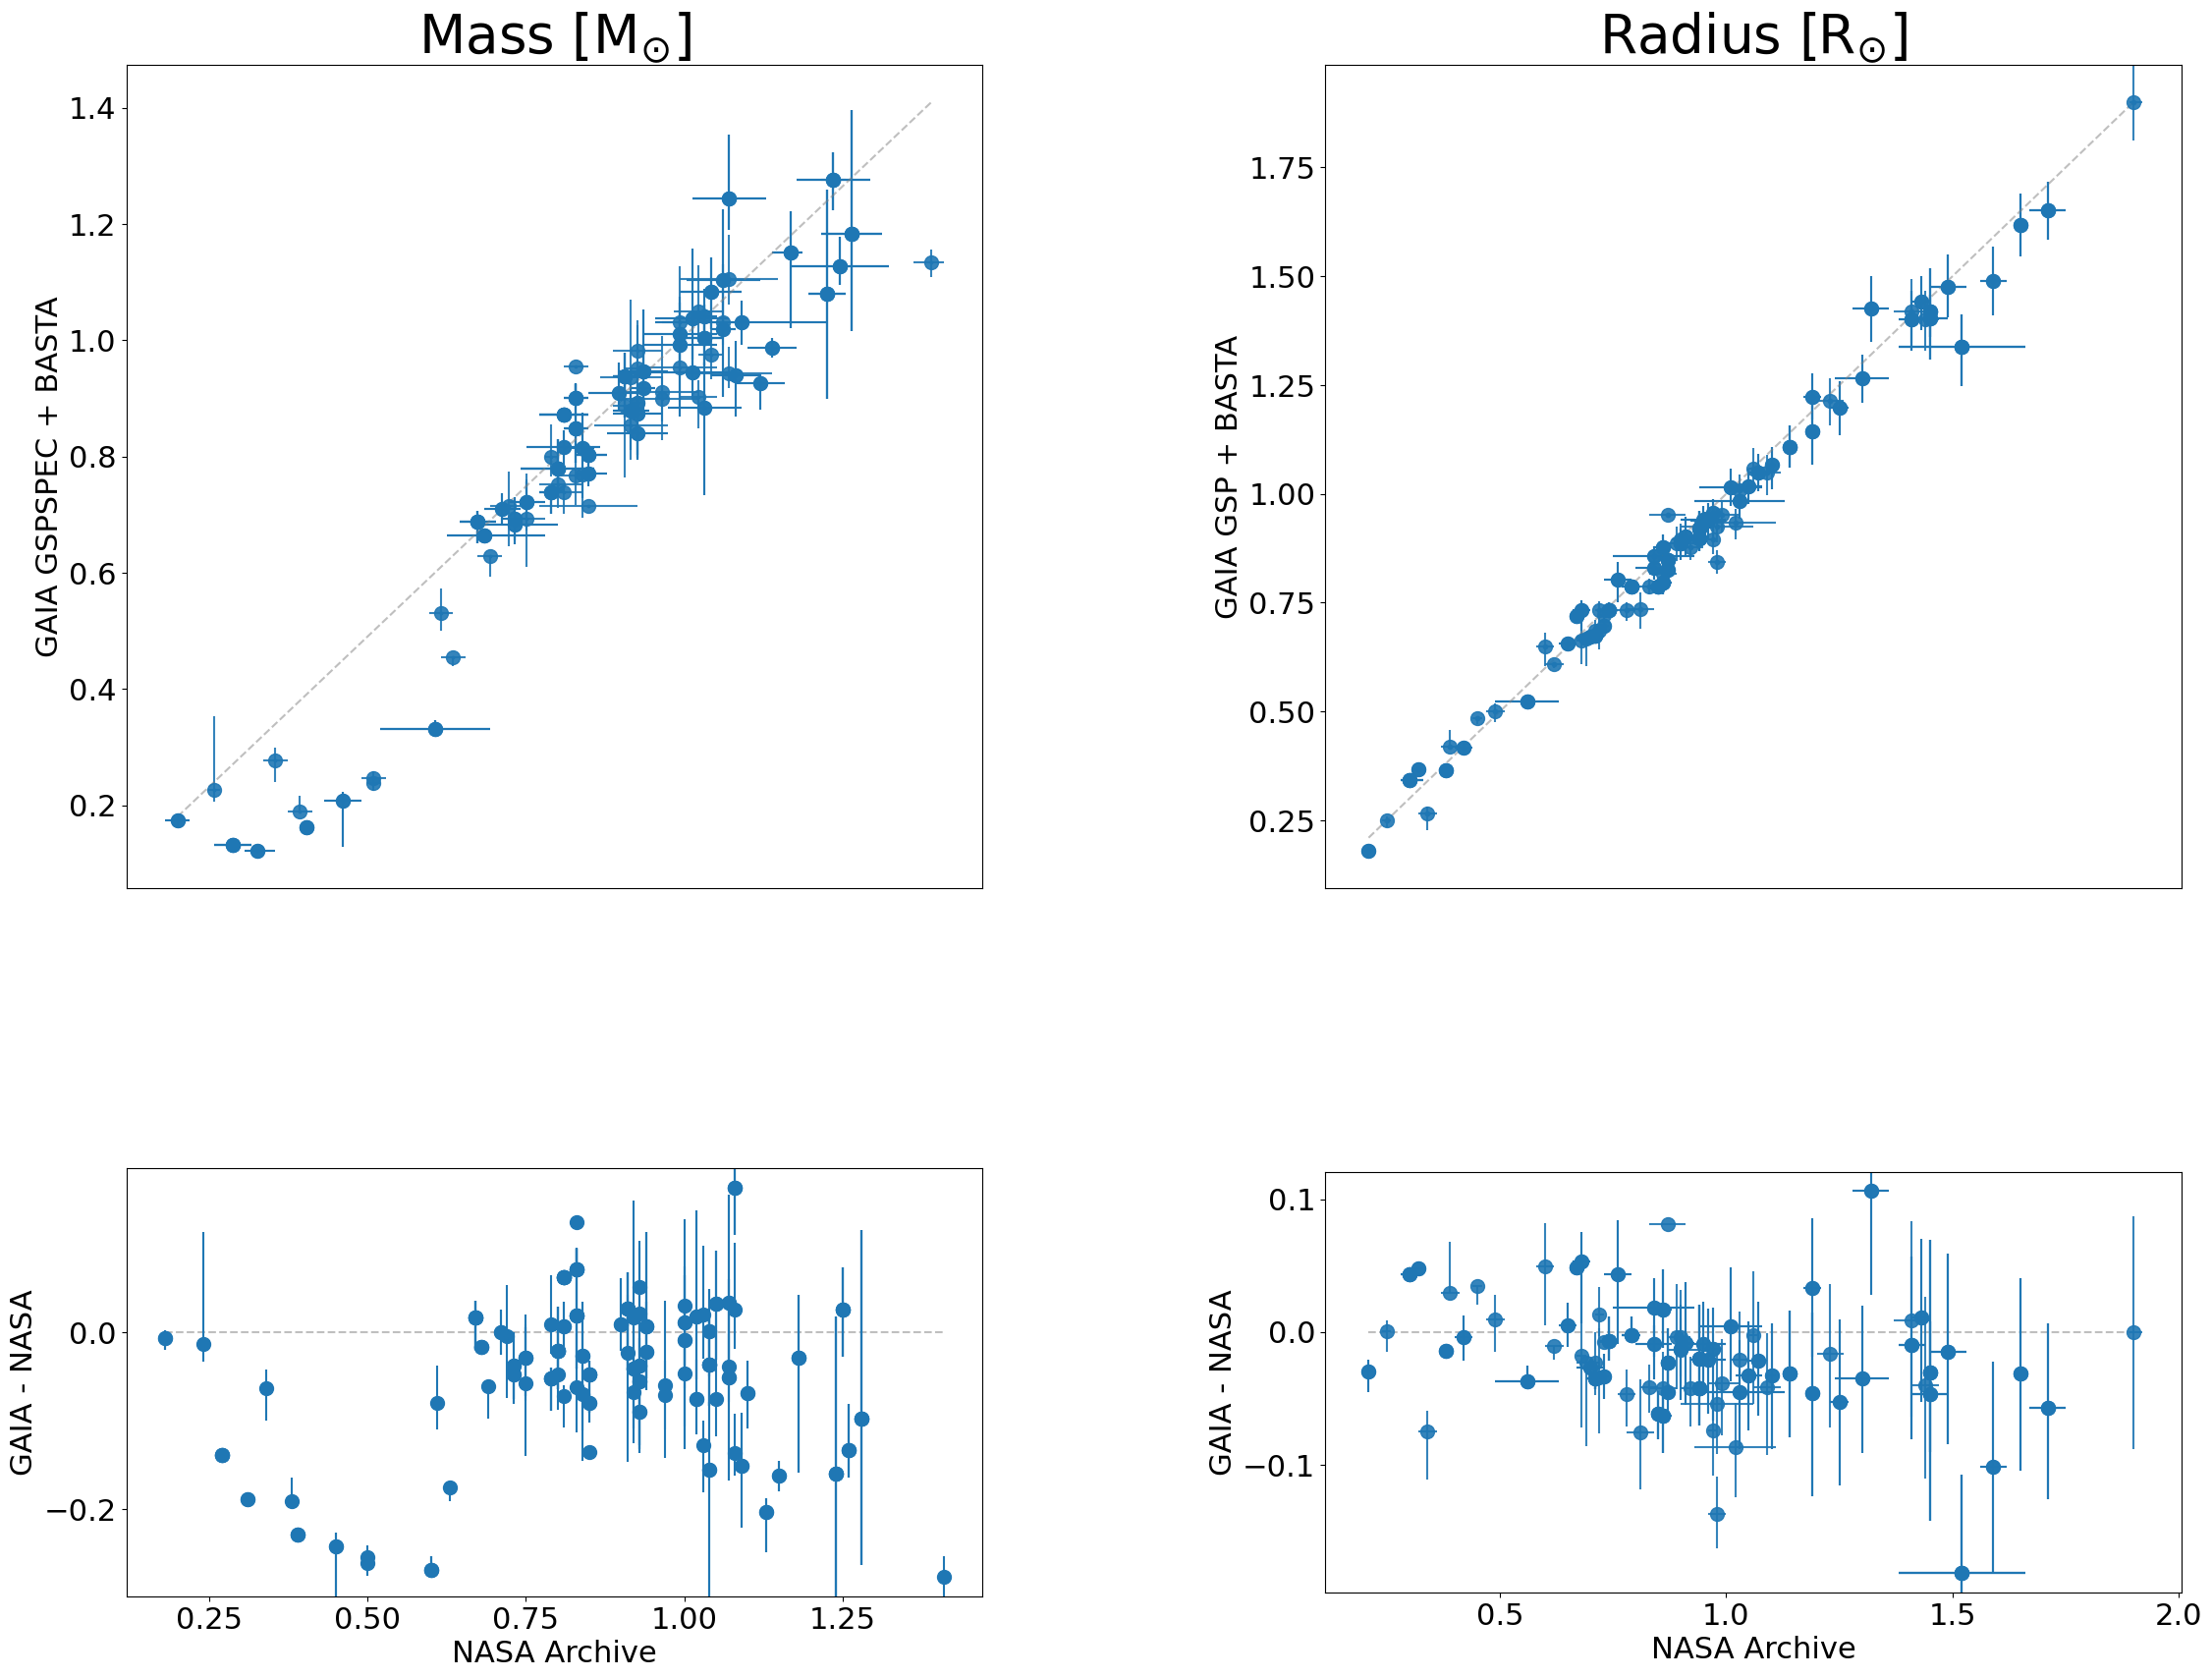

In [6]:
df = full

fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(27,22), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)

plt.rcParams.update({'font.size': 33})
plt.rcParams.update({'xtick.major.size': 33})
plt.rcParams.update({'xtick.labelsize': 33})
plt.rcParams.update({'ytick.major.size': 33})
plt.rcParams.update({'ytick.labelsize': 33})



ax[0,0].set_title('Mass [M$_{\odot}$]')
ax[0,0].scatter(df['st_mass'], df['massfin_gsp'], s=3)

yerr00 = [np.array(df['massfin_errm_gsp']),np.array(df['massfin_errp_gsp'])]
xerr00 = [-np.array(df['st_masserr2']),np.array(df['st_masserr1'])]

ax[0,0].errorbar(df['st_mass'], df['massfin_gsp'], yerr=yerr00, xerr=xerr00, marker='o', ms=10, ls='none', alpha=0.9)

y = np.linspace(min(df['st_mass']),max(df['st_mass']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('GAIA GSPSPEC + BASTA')
ax[0,0].set_xticks([])

x = np.linspace(min(df['st_mass']),max(df['st_mass']), 100)
y = np.linspace(0,0, 100)




ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].errorbar(df['st_mass'], df['massfin_gsp']-df['st_mass'], marker='o', ls='none', yerr=yerr00, ms=10)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,0].set_ylabel('GAIA - NASA')
ax[1,0].set_xlabel('NASA Archive')

range = max(df['st_mass'])-min(df['st_mass'])
residual = df['massfin_gsp']-df['st_mass']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################

ax[0,1].set_title('Radius [R$_{\odot}$]')
ax[0,1].scatter(df['st_rad'], df['radPhot_gsp'], s=10)

yerr01 = [np.array(df['radPhot_errm_gsp']),np.array(df['radPhot_errp_gsp'])]
xerr01 = [-np.array(df['st_raderr2']),np.array(df['st_raderr1'])]

ax[0,1].errorbar(df['st_rad'], df['radPhot_gsp'], yerr=yerr01, xerr=xerr01, marker='o', ms=10, ls='none', alpha=0.9)

y = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
x = y

ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,1].set_ylabel('GAIA GSP + BASTA')
ax[0,1].set_xticks([])

x = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
y = np.linspace(0,0, 100)




ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

#ax[1,1].scatter(df['st_rad'], df['radPhot_gaia']-df['st_rad'], s=3)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,1].errorbar(df['st_rad'], df['radPhot_gsp']-df['st_rad'], yerr=yerr01, xerr=xerr01, marker='o', ms = 10, ls='none', alpha=0.9)
ax[1,1].set_ylabel('GAIA - NASA')
ax[1,1].set_xlabel('NASA Archive')

range = max(df['st_rad'])-min(df['st_rad'])
residual = df['radPhot_gsp']-df['st_rad']
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))


############################################################################################################

############################################################################################################
plt.savefig('basta_nasa_params.png')
plt.show()

<ipython-input-16-23e47cbcb1da>:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)


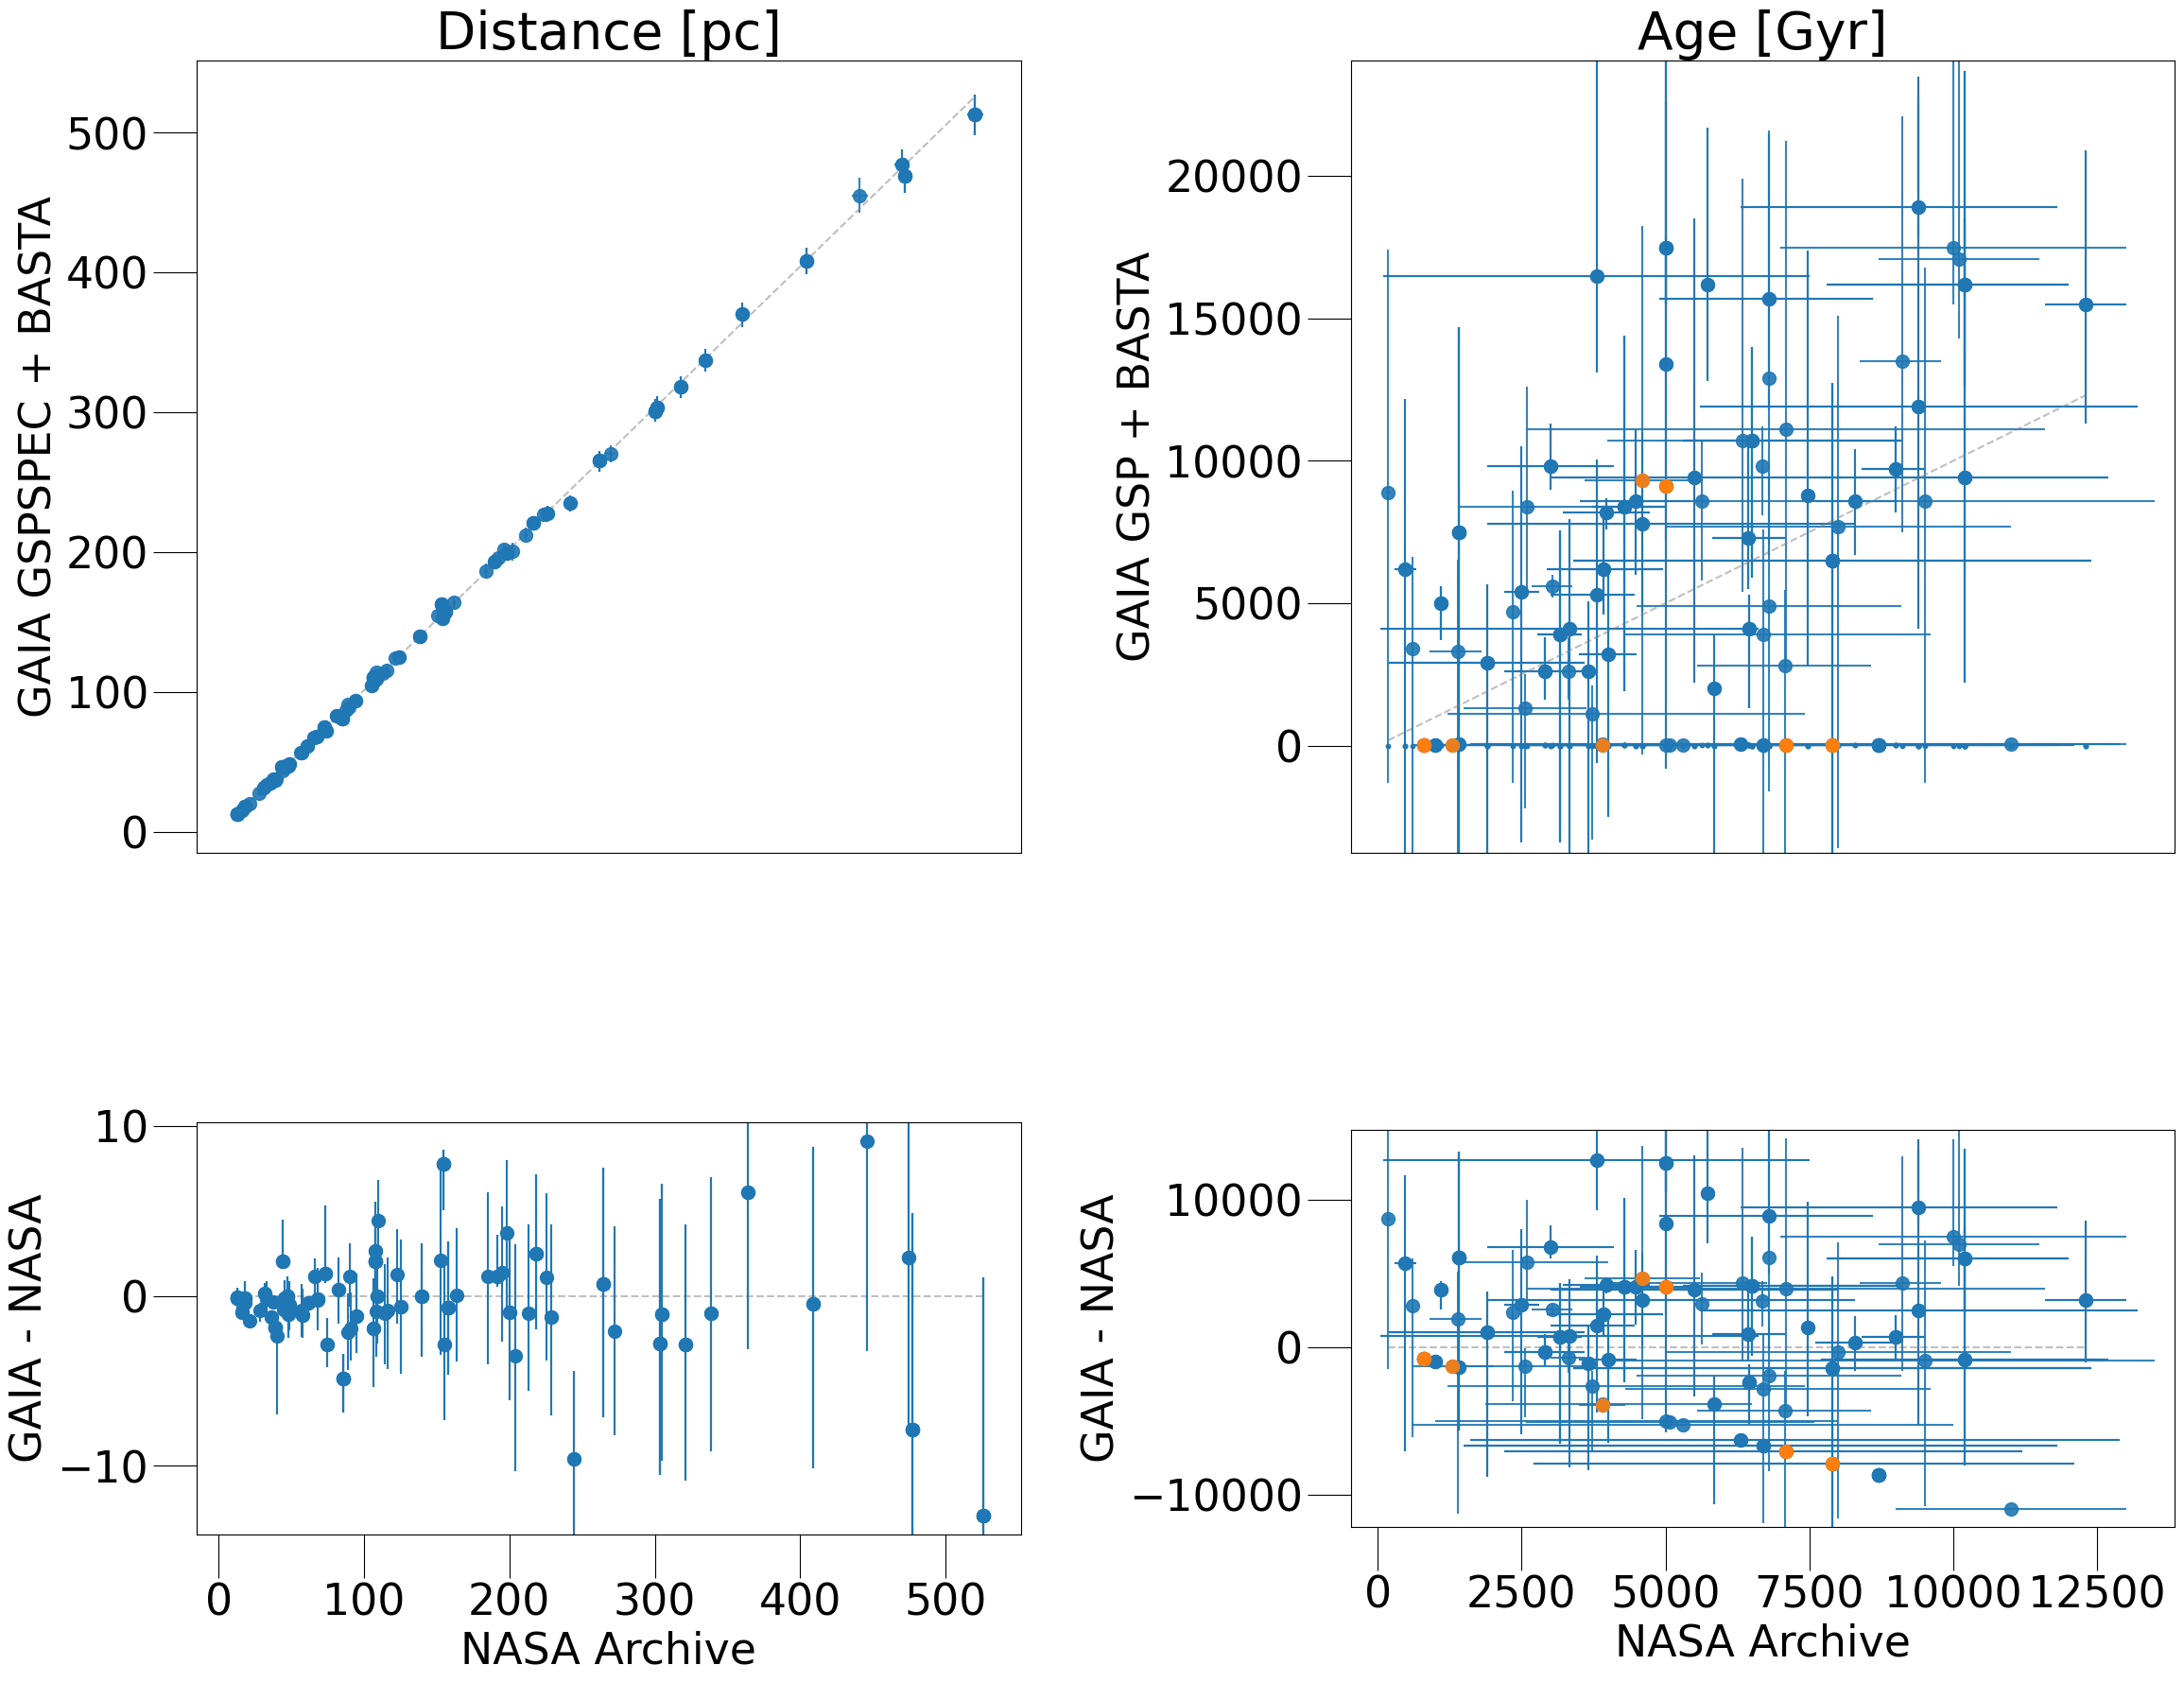

20.0
2       223158499179138432
3       252366608956186240
4       549007291282705024
16     1372215976327300480
17     1372215976327300480
19     1678074272650459008
20     1678074272650459008
33     2096535783864546944
142    4781196115469953024
143    4781196115469953024
144    4781196115469953024
146    5271055243163629056
147    5271055243163629056
148    5271055243163629056
149    5271055243163629056
151    5413438219396893568
152    5413438219396893568
170    6468968316900356736
Name: gaia_id, dtype: int64 2       223158499179138432
3       252366608956186240
15     1070387905514406400
16     1372215976327300480
17     1372215976327300480
19     1678074272650459008
20     1678074272650459008
108    3796690380302214272
109    3796690380302214272
110    3796690380302214272
142    4781196115469953024
143    4781196115469953024
144    4781196115469953024
146    5271055243163629056
147    5271055243163629056
148    5271055243163629056
149    5271055243163629056
170    646896831690035

In [16]:


fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(27,22), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)

plt.rcParams.update({'font.size': 33})
plt.rcParams.update({'xtick.major.size': 33})
plt.rcParams.update({'xtick.labelsize': 33})
plt.rcParams.update({'ytick.major.size': 33})
plt.rcParams.update({'ytick.labelsize': 33})



ax[0,0].set_title('Distance [pc]')
ax[0,0].scatter(df['sy_dist'], df['distance_gsp'], s=3)

yerr00 = [np.array(df['distance_errm_gsp']),np.array(df['distance_errp_gsp'])]
xerr00 = [-np.array(df['sy_disterr2']),np.array(df['sy_disterr1'])]

ax[0,0].errorbar(df['sy_dist'], df['distance_gsp'], yerr=yerr00, xerr=xerr00, marker='o', ms=10, ls='none', alpha=0.9)

y = np.linspace(min(df['sy_dist']),max(df['sy_dist']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('GAIA GSPSPEC + BASTA')
ax[0,0].set_xticks([])

x = np.linspace(min(df['sy_dist']),max(df['sy_dist']), 100)
y = np.linspace(0,0, 100)

ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].errorbar(df['sy_dist'], df['distance_gsp']-df['sy_dist'], marker='o', ls='none', yerr=yerr00, ms=10)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,0].set_ylabel('GAIA - NASA')
ax[1,0].set_xlabel('NASA Archive')

range = max(df['sy_dist'])-min(df['sy_dist'])
residual = df['distance_gsp']-df['sy_dist']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################
df_lm = df[df['massfin_gsp']<=0.3]
ax[0,1].set_title('Age [Gyr]')
ax[0,1].scatter(df['st_age']*1000, df['radPhot_gsp'], s=10)

yerr01 = [np.array(df['age_errm_gsp']),np.array(df['age_errp_gsp'])]
xerr01 = [-np.array(df['st_ageerr2']*1000),np.array(df['st_ageerr1']*1000)]

ax[0,1].errorbar(df['st_age']*1000, df['age_gsp'], yerr=yerr01, xerr=xerr01, marker='o', ms=10, ls='none', alpha=0.9)
ax[0,1].errorbar(df_lm['st_age']*1000, df_lm['age_gsp'], marker='o', ms = 10, ls='none', alpha=0.9, label = 'low mass stars')
y = np.linspace(min(df['st_age']*1000),max(df['st_age']*1000), 100)
x = y

ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,1].set_ylabel('GAIA GSP + BASTA')
ax[0,1].set_xticks([])

x = np.linspace(min(df['st_age']*1000),max(df['st_age']*1000), 100)
y = np.linspace(0,0, 100)




ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

#ax[1,1].scatter(df['st_rad'], df['radPhot_gaia']-df['st_rad'], s=3)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)

ax[1,1].errorbar(df['st_age']*1000, df['age_gsp']-df['st_age']*1000, yerr=yerr01, xerr=xerr01, marker='o', ms = 10, ls='none', alpha=0.9)
ax[1,1].errorbar(df_lm['st_age']*1000, df_lm['age_gsp']-df_lm['st_age']*1000, marker='o', ms = 10, ls='none', alpha=0.9, label = 'low mass stars')
ax[1,1].set_ylabel('GAIA - NASA')
ax[1,1].set_xlabel('NASA Archive')

range = max(df['st_age']*1000)-min(df['st_age']*1000)
residual = df['age_gsp']-df['st_age']*1000
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))


############################################################################################################

############################################################################################################
plt.savefig('basta_nasa_params.png')
plt.show()


20.0


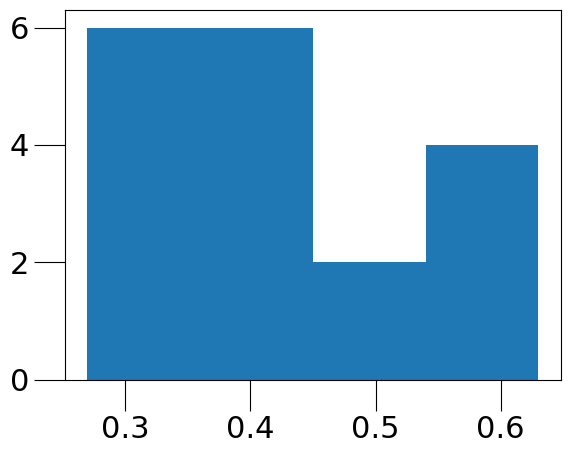

In [79]:

print(df['age_gsp'].min())
df_age0=df[df['age_gsp']==20]
df_age0['gaia_id'].to_csv('/Users/afw2/BASTA/Paper1/data/bad_ages_names.csv')
df_lm['gaia_id'].to_csv('/Users/afw2/BASTA/Paper1/data/low_mass_names.csv')

age0 = pd.merge(df_age0, gsp, on='#starid')
1000/age0['parallax_phs_gaia']
plt.hist(age0['st_mass'], bins=4)
plt.show()

age0 = age0[['#starid', 'RA', 'DEC', 'Teff', 'Teff_err', 'MeH', 'MeH_err', 'logg',
                                        'logg_err',
                                        'parallax',
                                        'parallax_err', 'Mj_2MASS', 'Mj_2MASS_err', 'Mk_2MASS', 'Mk_2MASS_err',
                                        'Mh_2MASS',
                                        'Mh_2MASS_err']]
age0.drop_duplicates()
age0.to_csv('data/gsp_spec_age0.ascii', sep=' ')


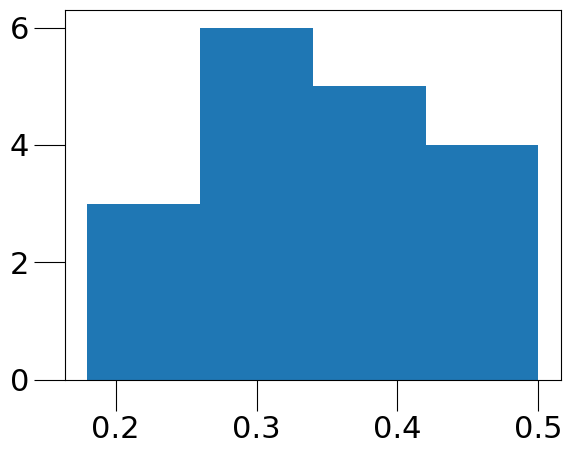

In [80]:
df_lm['gaia_id'].to_csv('/Users/afw2/BASTA/Paper1/data/low_mass_names.csv')

lm = pd.merge(df_lm, gsp, on='#starid')

plt.show()

lm = lm[['#starid', 'RA', 'DEC', 'Teff', 'Teff_err', 'MeH', 'MeH_err', 'logg',
                                        'logg_err',
                                        'parallax',
                                        'parallax_err', 'Mj_2MASS', 'Mj_2MASS_err', 'Mk_2MASS', 'Mk_2MASS_err',
                                        'Mh_2MASS',
                                        'Mh_2MASS_err']]
lm.drop_duplicates()
lm.to_csv('data/gsp_spec_lm.ascii', sep=' ')


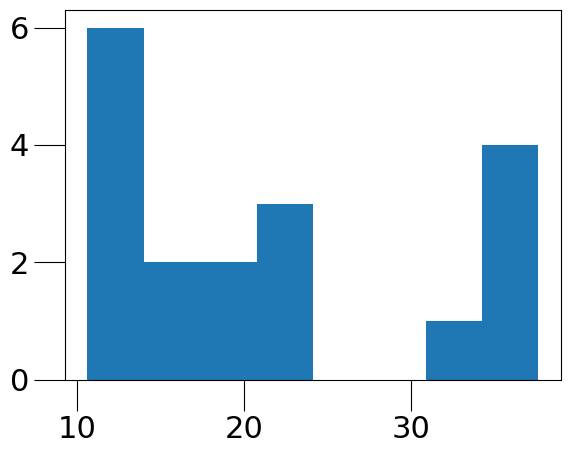

In [84]:
plt.hist(1000/lm['parallax'], bins=8)
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'xtick.major.size': 22})
plt.rcParams.update({'xtick.labelsize': 22})
plt.rcParams.update({'ytick.major.size': 22})
plt.rcParams.update({'ytick.labelsize': 22})

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)

ax[0].hist(df['st_teff'], histtype='step', label='NASA', linewidth=3, bins=10)
#ax[0].set_xticks([])
ax[1].set_xlabel('Teff [K]')
ax[0].legend()


ax[1].hist(df['teff_gspspec'], histtype='step', label='GSP Spec',linewidth=3, color='black', bins=10)
#ax[1].set_xticks([])
ax[1].set_xlabel('Teff [K]')
ax[1].legend()

ax[2].hist(df['teff_gspphot'], histtype='step', label='GSP Phot', linewidth=3, color='gray', bins=10)
ax[2].set_xlabel('Teff [K]')
plt.setp(ax, ylim=ax[2].get_ylim())
ax[2].legend()

plt.savefig('teff_comp.pdf')

plt.show()

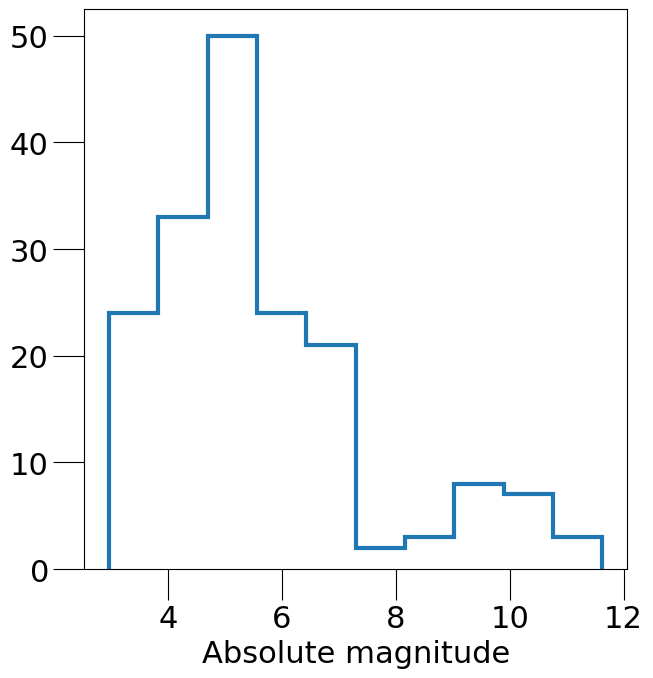

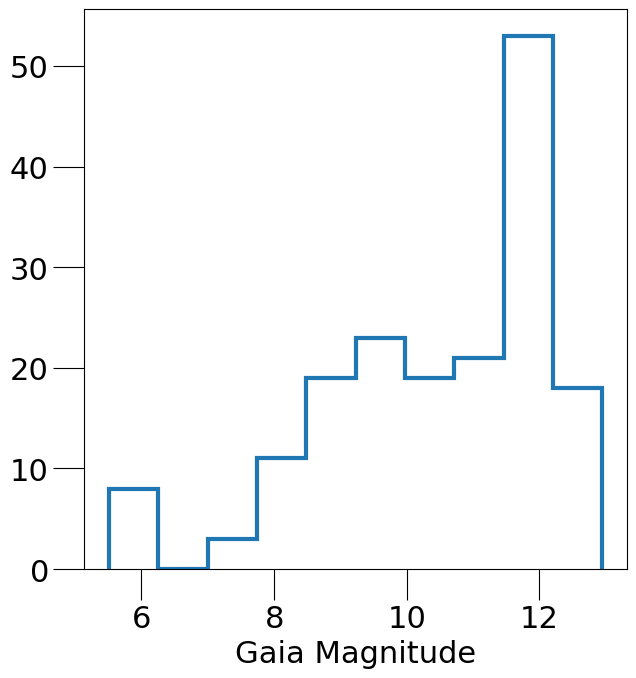

In [45]:
GM = df['phot_g_mean_mag'] + 5*np.log10(df['parallax_phs_gaia'])-10

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)

ax.hist(GM, histtype='step', label='NASA', linewidth=3, bins=10)
#ax[0].set_xticks([])
ax.set_xlabel('Absolute magnitude')



plt.savefig('absmag.pdf')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)

ax.hist(df['phot_g_mean_mag'], histtype='step', label='NASA', linewidth=3, bins=10)
#ax[0].set_xticks([])
ax.set_xlabel('Gaia Magnitude')


plt.savefig('gmag.pdf')


plt.show()

<ipython-input-38-e35a8928fef1>:46: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)


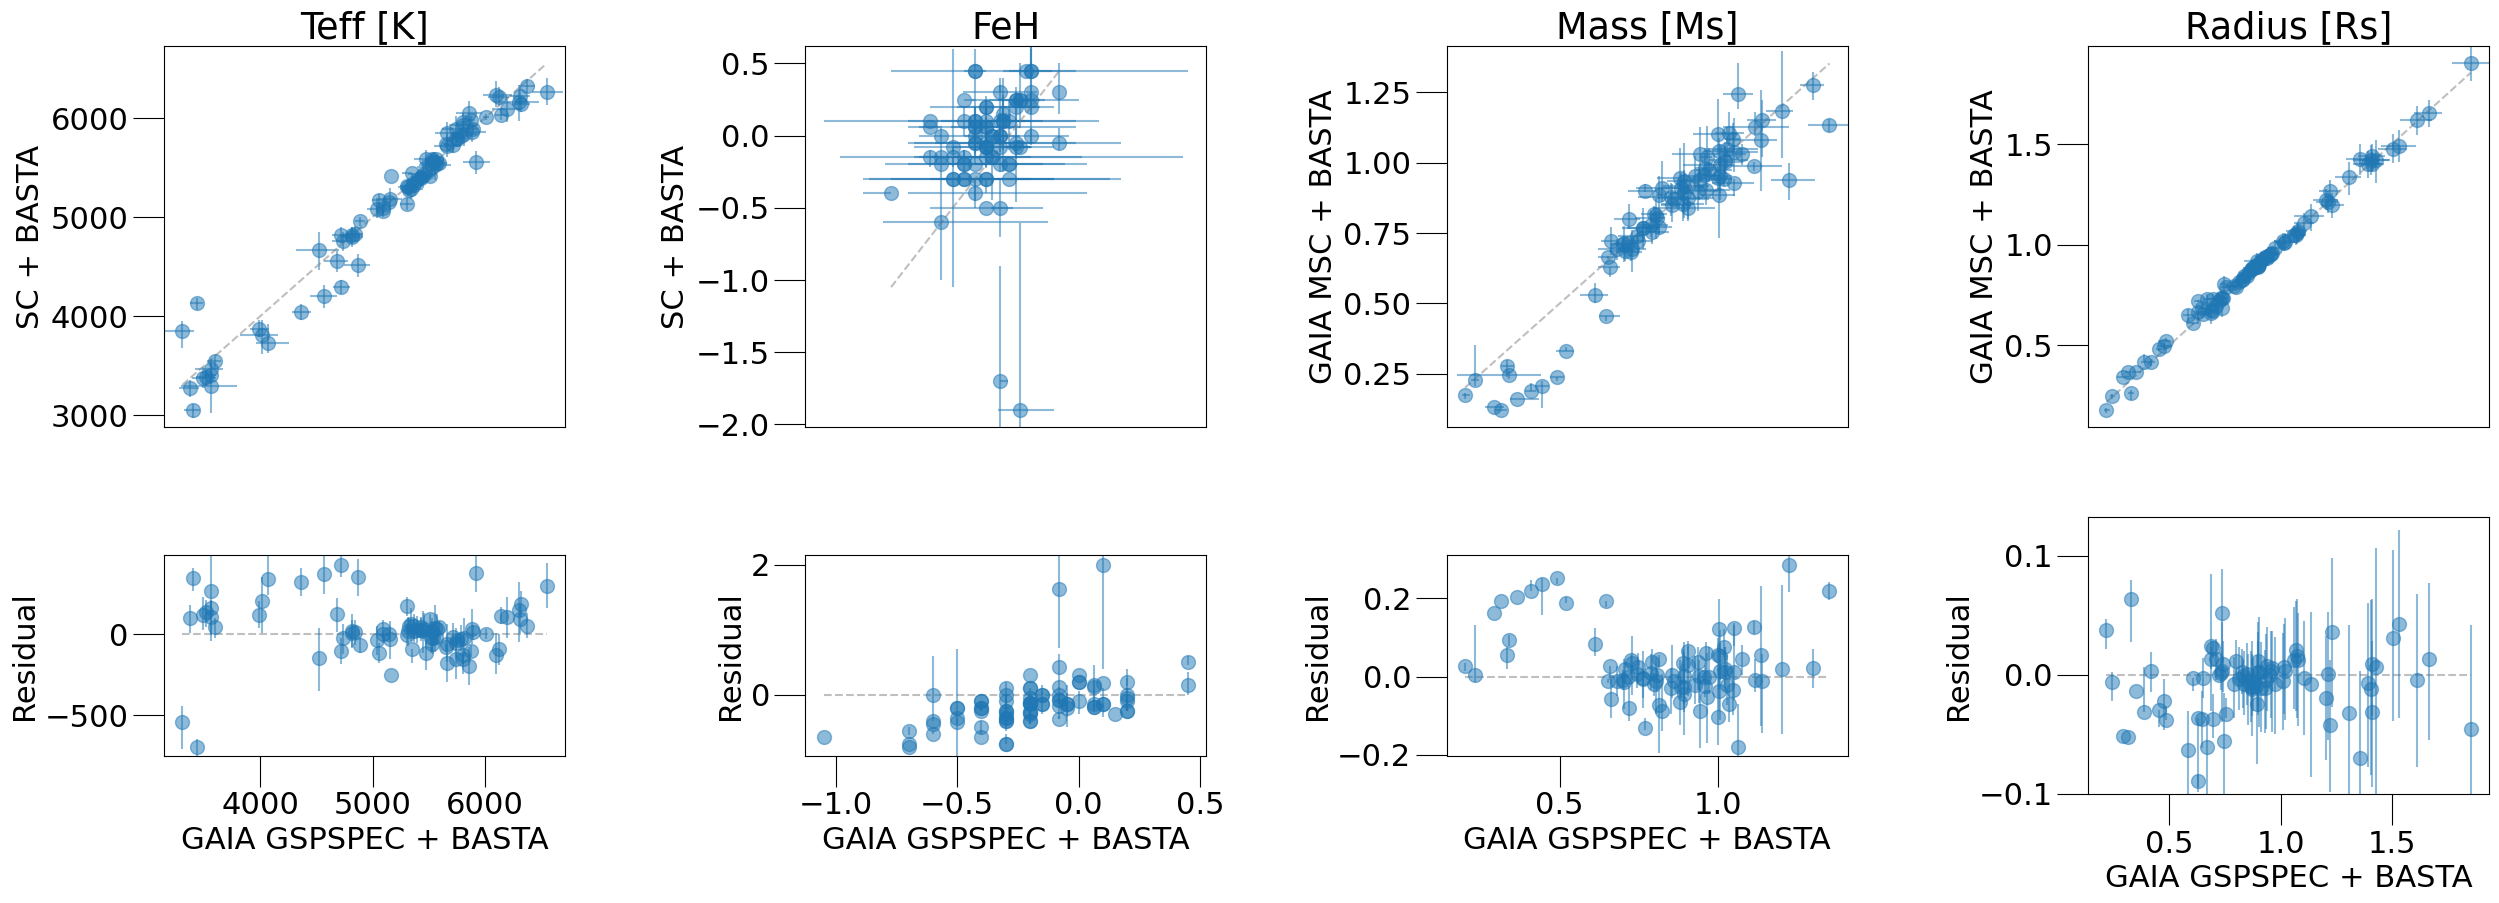

In [38]:
#plt.style.use('dark_background')
def plot_comparison(d, i,j, x,y,xerrp, xerrm,yerrp,yerrm, title, ylabel, xlabel):

    plt.rcParams.update({'font.size': 22})
    plt.rcParams.update({'xtick.major.size': 22})
    plt.rcParams.update({'xtick.labelsize': 22})
    plt.rcParams.update({'ytick.major.size': 22})
    plt.rcParams.update({'ytick.labelsize':22})
    ax[i[0], i[1]].set_title(title)
    #ax[i,i].scatter(d['Teff_msc'], d['Teff_gsp'], s=3)

    if yerrp and yerrm and xerrp and xerrm:

        yerr00 = [np.array(d[yerrm]),np.array(d[yerrp])]
        xerr00 = [np.array(d[xerrm]),np.array(d[xerrp])]
    else:
         print("need to include errors!")

    ax[i[0], i[1]].errorbar(d[x], d[y], yerr=yerr00, xerr=xerr00, ms=10, marker='o', ls='none', alpha=0.5)

    ypl = np.linspace(min(d[x]),max(d[x]), 100)
    xpl = ypl

    ax[i[0], i[1]].plot(xpl,ypl, linestyle='--', color = 'gray', alpha=0.5)

    ax[i[0], i[1]].set_ylabel(ylabel)
    ax[i[0], i[1]].set_xticks([])

    xpl = np.linspace(min(d[x]),max(d[x]), 100)
    ypl = np.linspace(0,0, 100)

    ax[j[0],j[1]].plot(xpl,ypl, linestyle='--', color = 'gray', alpha=0.5)

    ax[j[0],j[1]].errorbar(d[x], d[x]-d[y], yerr=yerr00, ms=10, marker='o', ls='none', alpha=0.5)
    #ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
    ax[j[0],j[1]].set_ylabel('Residual')
    ax[j[0],j[1]].set_xlabel(xlabel)

    range = max(d[x])-min(d[x])
    residual = d[y]-d[x]
    residual_range = max(residual) - min(residual)
    ax[j[0],j[1]].set_aspect(range/(residual_range*2))


fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(30,10),layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)

plot_comparison(d=out,i=[0,0],j=[1,0], x='Teff_sc', y='Teff_gsp', xerrp='Teff_errp_sc', xerrm='Teff_errm_sc',  yerrp='Teff_errp_sc', yerrm='Teff_errm_sc', ylabel='SC + BASTA', xlabel='GAIA GSPSPEC + BASTA', title='Teff [K]')

plot_comparison(d=out, i=[0,1],j=[1,1], x='FeH_msc', y='FeH_gsp', xerrp='FeH_errp_msc', xerrm='FeH_errm_msc',  yerrp='FeH_errp_gsp', yerrm='FeH_errm_gsp', ylabel='SC + BASTA', xlabel='GAIA GSPSPEC + BASTA', title='FeH')


plot_comparison(d=out,i=[0,2],j=[1,2], x='massfin_sc', y='massfin_gsp', xerrp='massfin_errp_sc', xerrm='massfin_errm_sc',  yerrp='massfin_errp_gsp', yerrm='massfin_errm_gsp', ylabel='GAIA MSC + BASTA', xlabel='GAIA GSPSPEC + BASTA', title='Mass [Ms]')

plot_comparison(d=out, i=[0,3],j=[1,3], x='radPhot_sc', y='radPhot_gsp', xerrp='radPhot_errp_sc', xerrm='radPhot_errm_sc',  yerrp='radPhot_errp_gsp', yerrm='radPhot_errm_gsp', ylabel='GAIA MSC + BASTA', xlabel='GAIA GSPSPEC + BASTA', title='Radius [Rs]')

plt.savefig('figures/output_comparisons_sc_gsp.pdf')
plt.show()
############################################################################################################

############################################################################################################





<ipython-input-39-86de34a8dbe0>:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)


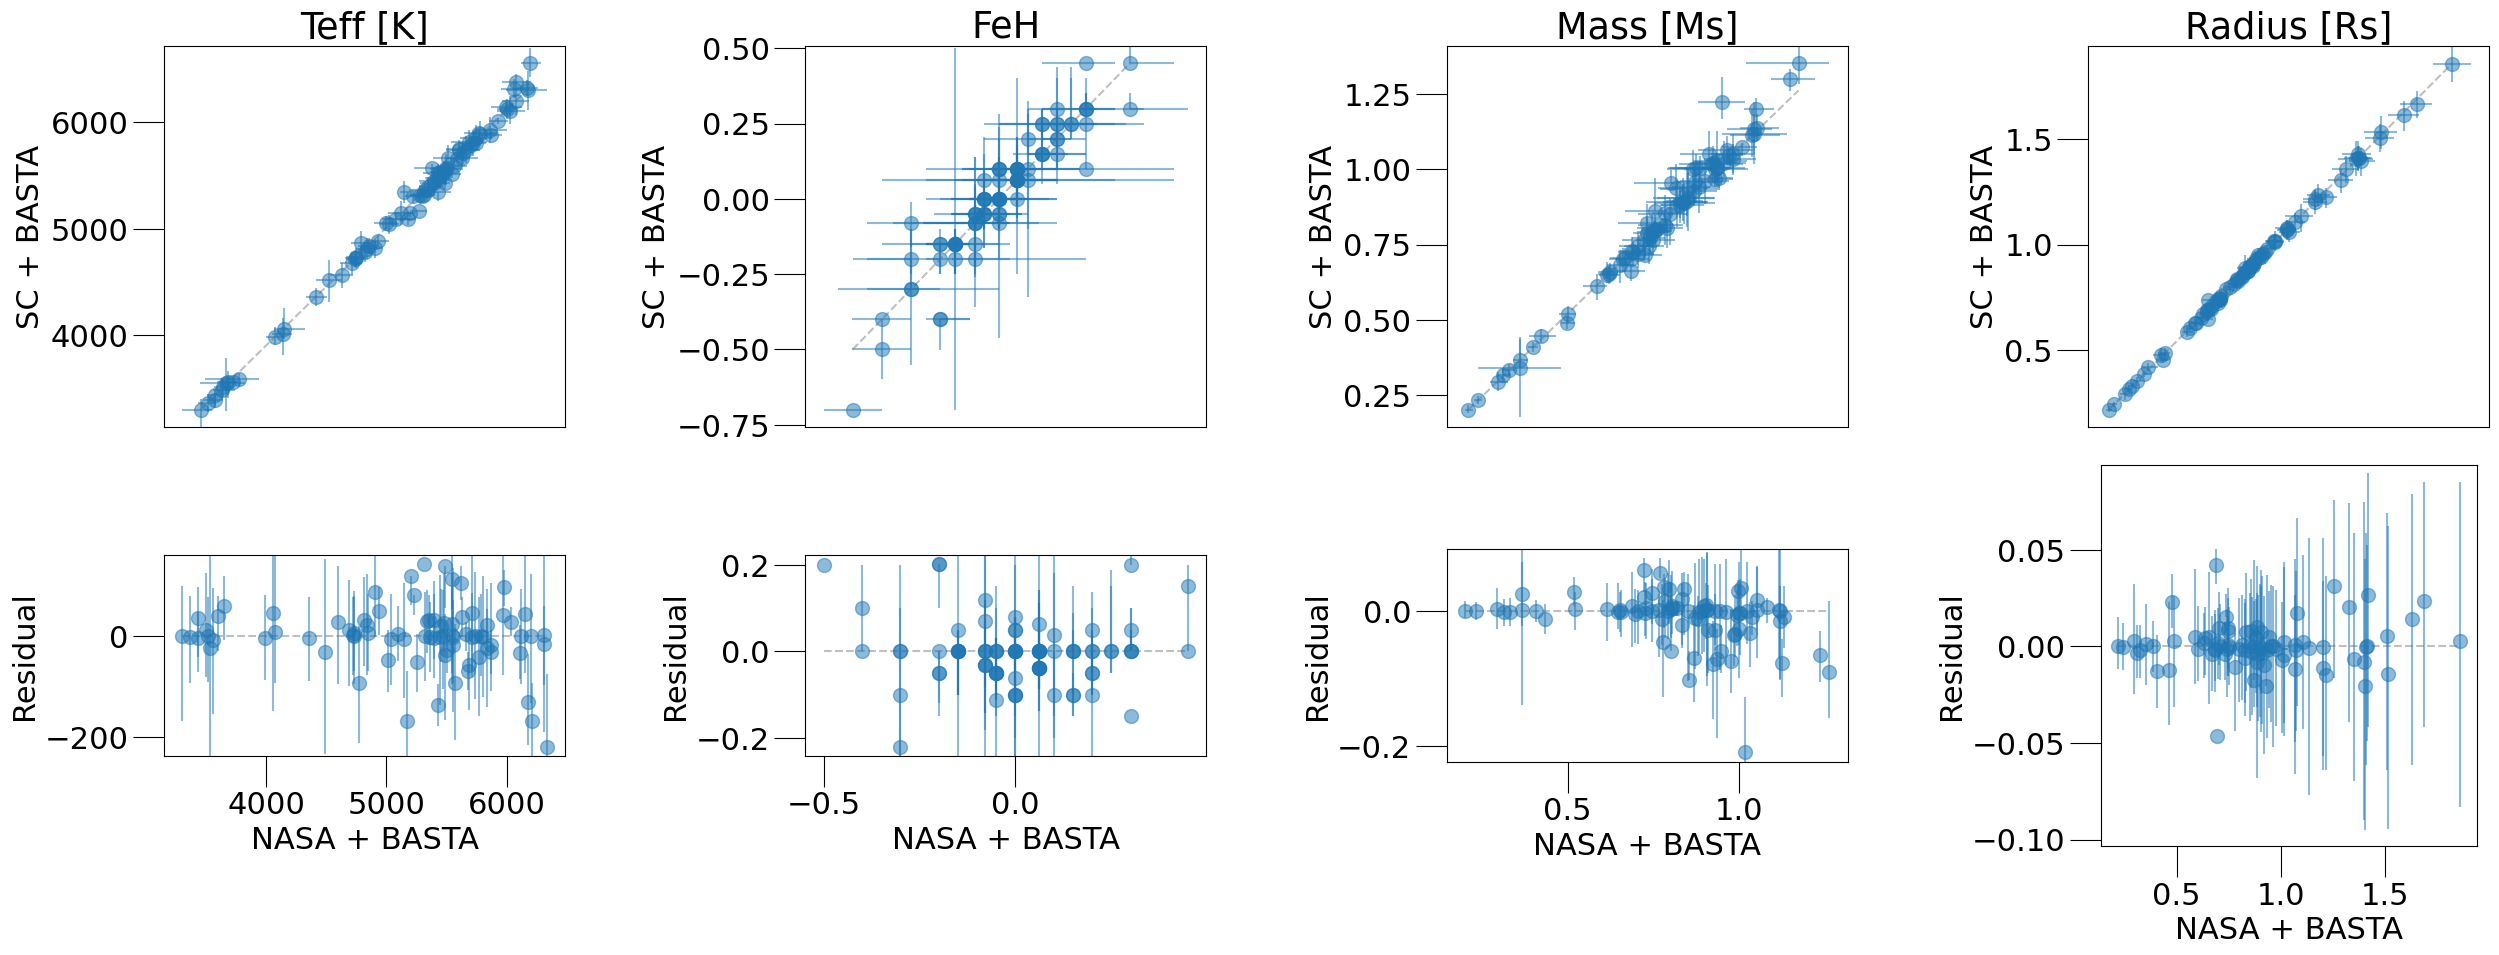

In [39]:
fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(30,10),layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)

plot_comparison(d=out,i=[0,0],j=[1,0], x='Teff_nasa', y='Teff_sc', xerrp='Teff_errp_nasa', xerrm='Teff_errm_nasa',  yerrp='Teff_errp_sc', yerrm='Teff_errm_sc', ylabel='SC + BASTA', xlabel='NASA + BASTA', title='Teff [K]')

plot_comparison(d=out, i=[0,1],j=[1,1], x='FeH_nasa', y='FeH_sc', xerrp='FeH_errp_nasa', xerrm='FeH_errm_nasa',  yerrp='FeH_errp_sc', yerrm='FeH_errm_sc', ylabel='SC + BASTA', xlabel='NASA + BASTA', title='FeH')

plot_comparison(d=out,i=[0,2],j=[1,2], x='massfin_nasa', y='massfin_sc', xerrp='massfin_errp_nasa', xerrm='massfin_errm_nasa',  yerrp='massfin_errp_sc', yerrm='massfin_errm_sc', ylabel='SC + BASTA', xlabel='NASA + BASTA', title='Mass [Ms]')

plot_comparison(d=out, i=[0,3],j=[1,3], x='radPhot_nasa', y='radPhot_sc', xerrp='radPhot_errp_nasa', xerrm='radPhot_errm_nasa',  yerrp='radPhot_errp_sc', yerrm='radPhot_errm_sc', ylabel='SC + BASTA', xlabel='NASA + BASTA', title='Radius [Rs]')
plt.savefig('figures/output_comparisons_sc_nasa.pdf')
plt.show()

<ipython-input-40-e219dae99d30>:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)


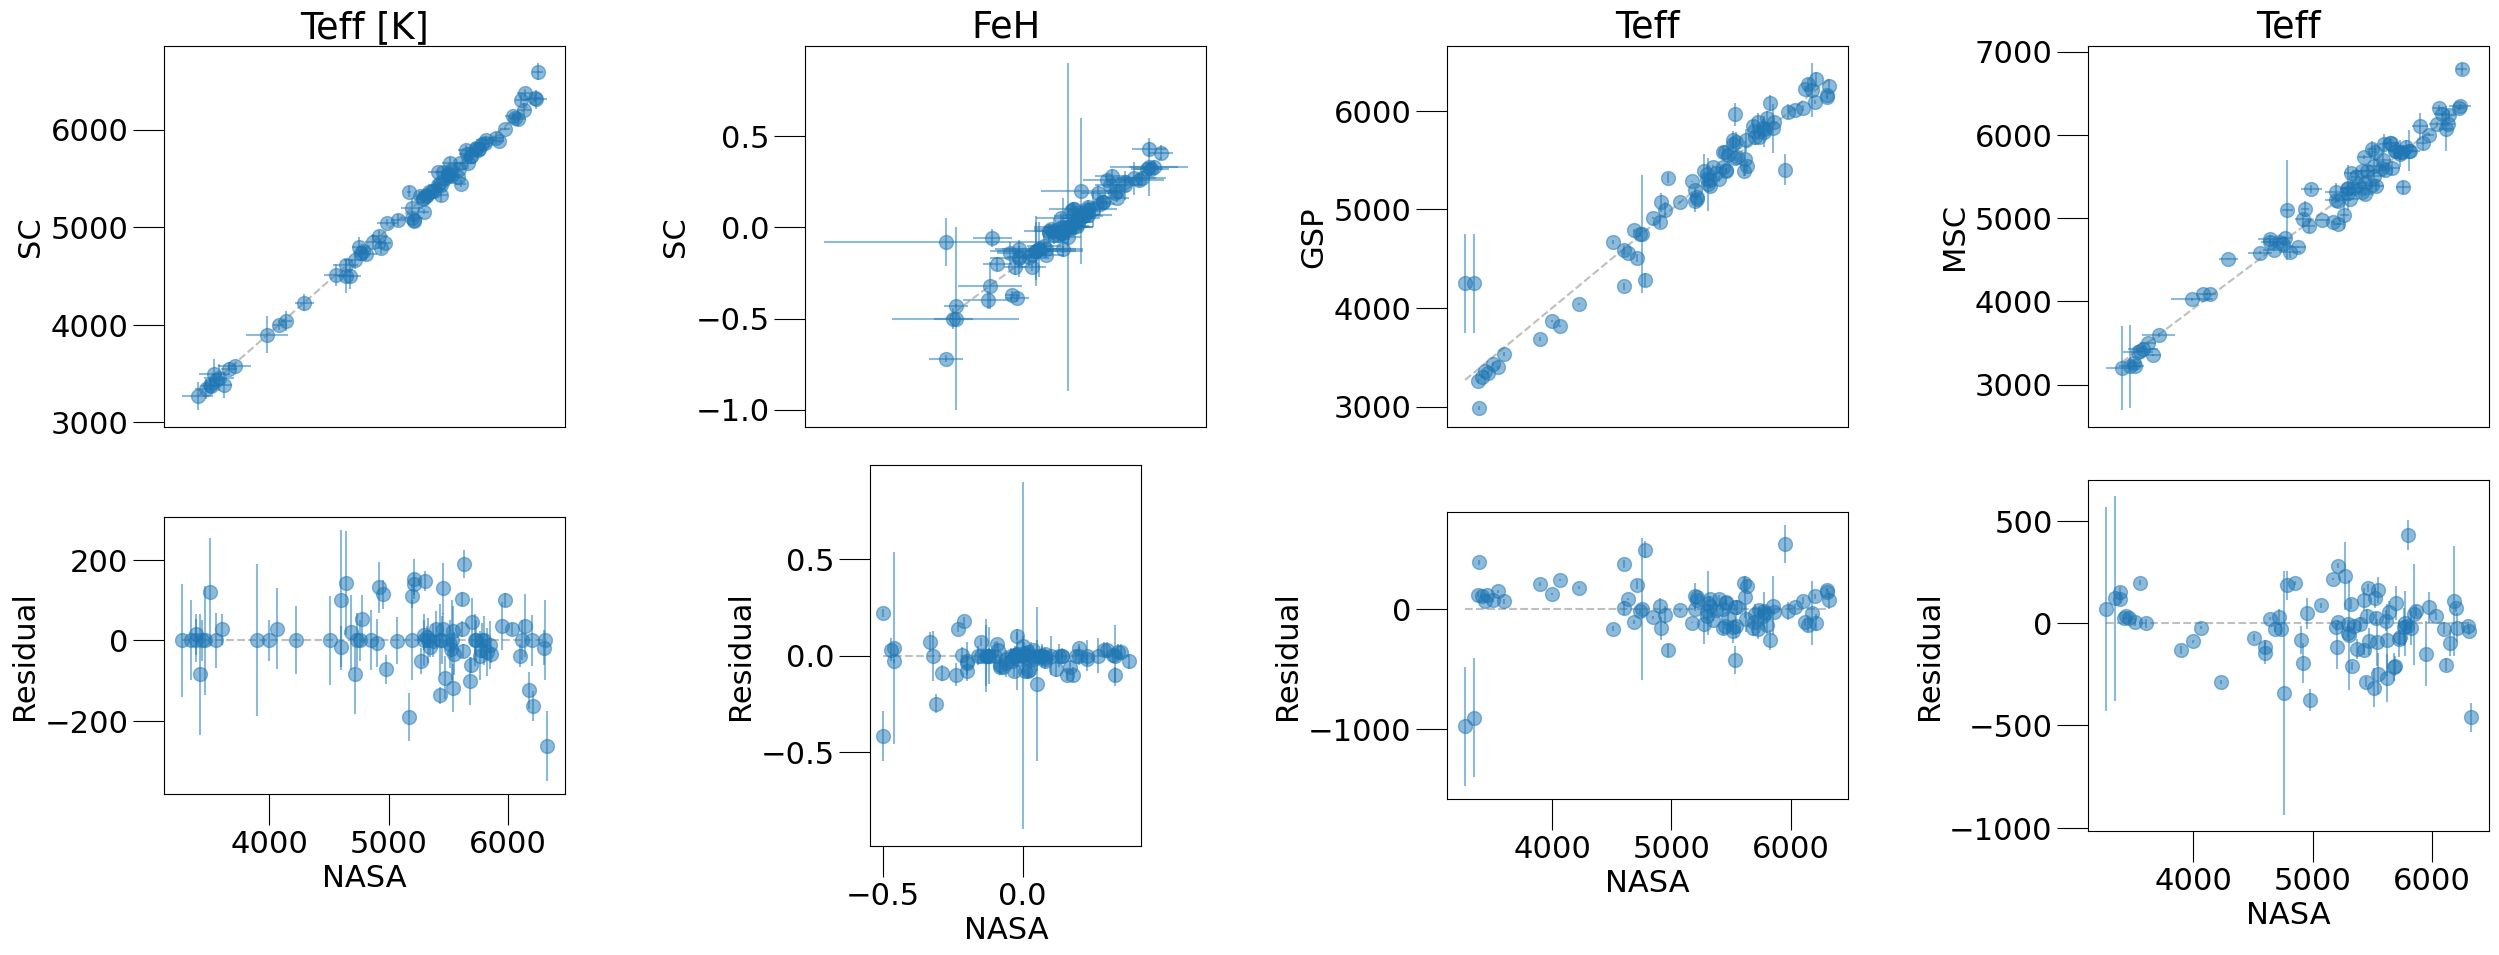

In [40]:
msc = pd.read_csv('/Users/afw2/BASTA/Paper1/data/basta_input_gaia_spec.ascii', delim_whitespace=True)
gsp = pd.read_csv('/Users/afw2/BASTA/Paper1/data/basta_input_gaia_spec_gsp.ascii', delim_whitespace=True)
#gspphot = pd.read_csv('/Users/afw2/BASTA/Paper1/output/gaia_phot/results.ascii', delim_whitespace=True)
sc = pd.read_csv('/Users/afw2/BASTA/Paper1/data/basta_input_sc.ascii', delim_whitespace=True)
nasa = pd.read_csv('/Users/afw2/BASTA/Paper1/data/basta_input_nasa.ascii', delim_whitespace=True)

d = pd.merge(gsp, msc, on='#starid', suffixes = ['_gsp', '_msc'])
f = pd.merge(sc, nasa, on='#starid', suffixes=['_sc', '_nasa'])

input = pd.merge(d, f, on='#starid', suffixes=[None, None])
#print(input.keys())

fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(30,10),layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.6, hspace=0.1)

plot_comparison(d=input,i=[0,0],j=[1,0], x='Teff_nasa', y='Teff_sc', xerrp='Teff_err_nasa', xerrm='Teff_err_nasa',  yerrp='Teff_err_sc', yerrm='Teff_err_sc', ylabel='SC', xlabel='NASA', title='Teff [K]')

plot_comparison(d=input, i=[0,1],j=[1,1], x='FeH_nasa', y='FeH_sc', xerrp='FeH_err_nasa', xerrm='FeH_err_nasa',  yerrp='FeH_err_sc', yerrm='FeH_err_sc', ylabel='SC', xlabel='NASA', title='FeH')

plot_comparison(d=input, i=[0,2],j=[1,2], x='Teff_nasa', y='Teff_gsp', xerrp='FeH_err_nasa', xerrm='FeH_err_nasa',  yerrp='Teff_err_gsp', yerrm='Teff_err_gsp', ylabel='GSP', xlabel='NASA', title='Teff')

plot_comparison(d=input, i=[0,3],j=[1,3], x='Teff_nasa', y='Teff_msc', xerrp='Teff_err_nasa', xerrm='Teff_err_nasa',  yerrp='Teff_err_gsp', yerrm='Teff_err_gsp', ylabel='MSC', xlabel='NASA', title='Teff')

plt.savefig('figures/input_comparisons.pdf')
plt.show()

In [6]:
full = pd.merge(out, input, on='#starid', suffixes=['out', '_in'])
nea_gaia_2m = pd.read_csv('/Users/afw2/BASTA/Paper1/data/gaia_phs_tm_ap_supp.csv')

full = pd.merge(nea_gaia_2m, full, left_on='gaia_id', right_on='#starid')
final_idx = (full['rv_flag'] == 1) * (full['tran_flag'] == 1) * (full['pl_bmassprov'] == 'Mass') * (full['pl_rade'] <= 4)
intermediate = full[final_idx]
error_cut_idx = (intermediate['pl_bmasseerr1'] / intermediate['pl_bmasse'] <= 0.25) * (intermediate['pl_radeerr1'] / intermediate['pl_rade'] <= 0.25)
full = intermediate[error_cut_idx]
full.drop_duplicates(subset='pl_name')
full

/Users/afw2/.conda/envs/Galpy_first_look/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (705) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gaia_phs_tm_ap_oid,gaia_phs_tm_oid,nea_dr3_tm_joiner_oid,gaia_id,ra_2_tm_join,dec_2_tm_join,parallax_tm_join,original_ext_source_id,clean_tmass_psc_xsc_oid,ra_tm,...,FeH_nasa_in,FeH_err_nasa,parallax_nasa,parallax_err_nasa,Mj_2MASS_nasa,Mj_2MASS_err_nasa,Mk_2MASS_nasa,Mk_2MASS_err_nasa,Mh_2MASS_nasa,Mh_2MASS_err_nasa
3,17,16,1566,704967037090946688,133.146761,28.329783,79.448184,08523579+2819509,375532653,133.149142,...,0.350,0.100,79.486026,0.042878,4.768,0.244,4.015,0.036,4.265,0.234
5,107,99,1263,2582617711154563968,13.080033,10.794705,4.085427,00521914+1047409,325722073,13.079774,...,0.010,0.010,4.121848,0.017973,10.770,0.023,10.344,0.021,10.454,0.026
7,111,103,654,6259263137059042048,228.248237,-16.724652,3.094682,15125956-1643282,236003375,228.248183,...,0.200,0.050,3.133680,0.016665,10.216,0.026,9.714,0.023,9.800,0.023
8,112,104,654,6259263137059042048,228.248237,-16.724652,3.094682,15125956-1643282,236003375,228.248183,...,0.200,0.050,3.133680,0.016665,10.216,0.026,9.714,0.023,9.800,0.023
9,113,105,654,6259263137059042048,228.248237,-16.724652,3.094682,15125956-1643282,236003375,228.248183,...,0.200,0.050,3.133680,0.016665,10.216,0.026,9.714,0.023,9.800,0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,3507,3507,148,5880886001621564928,222.165457,-57.588888,15.652877,14483982-5735175,58400811,222.165921,...,-0.092,0.076,15.677687,0.012572,9.145,0.018,8.432,0.038,8.557,0.046
169,3508,3508,427,5023809953208388352,28.715807,-29.421706,4.434682,01545169-2925186,182322912,28.715380,...,0.190,0.030,4.457724,0.014173,10.832,0.024,10.418,0.023,10.481,0.024
172,3620,3622,751,2613413008919918976,331.203094,-12.019073,3.700977,22044873-1201079,253198200,331.203047,...,0.380,0.050,3.744297,0.020075,10.613,0.022,10.192,0.026,10.310,0.022
173,3621,3623,751,2613413008919918976,331.203094,-12.019073,3.700977,22044873-1201079,253198200,331.203047,...,0.380,0.050,3.744297,0.020075,10.613,0.022,10.192,0.026,10.310,0.022


[[0.04851056537992404, 0], [0.011406659048486256, 1], [0.07545802729922069, 2], [0.11918490145153982, 3], [0.13684278094369162, 4], [0.13811038069774884, 5], [0.08784125640643925, 6], [0.04031045114018239, 7], [0.17092884058719116, 8], [0.07629575330606553, 9], [0.1247796065907747, 10], [0.1608828190370497, 11], [0.1426506198667008, 12], [0.14039734091603906, 13], [0.14769495849869418, 14], [0.05407622105677734, 15], [0.08888302244441659, 16], [0.04530332938695447, 17], [0.08204371619282558, 18], [0.06502643976012878, 19], [0.05038795547001307, 20], [0.07022098156453449, 21], [0.06217982850855863, 22], [0.016643379973610983, 23], [0.015494949166929839, 26], [0.09620315707628313, 28], [0.062370674748517096, 29], [0.12275046920760357, 30], [0.11839337593532995, 31], [0.12586336758485528, 32], [0.028417575552023733, 35], [0.11448045615305569, 36], [0.017122218648557563, 37], [0.029951969446947446, 39], [0.12723606533094944, 40], [0.06566848661827507, 41], [0.02447145529147421, 42], [0.130

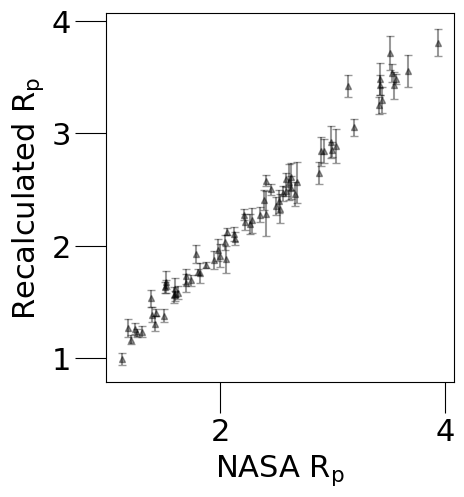

[[0.1751181991081534, 0], [0.020469552434307925, 1], [0.010009411050542205, 2], [0.13052701122189014, 5], [0.016338275112707246, 6], [0.15370494538037116, 7], [0.19183849134210273, 8], [0.010839061715899767, 9], [0.2100910316822424, 10], [0.22171584069111816, 11], [0.19979956729746862, 12], [0.19384388782488582, 13], [0.26381049022415626, 14], [0.02916145458599173, 15], [0.09042373794122027, 17], [0.1630865084472788, 18], [0.06666545660329071, 19], [0.02245863880947585, 20], [0.147080117961357, 21], [0.13688151410551752, 22], [0.05887880933625844, 23], [0.11198835438226729, 26], [0.21571046364698576, 28], [0.039977824442825494, 29], [0.11553726588874613, 30], [0.06395397713712936, 31], [0.12797555729106103, 32], [0.019219774965649083, 33], [0.018961145164015036, 34], [0.06852099802533518, 35], [0.07057615132297945, 36], [0.18175895294714906, 37], [0.13793461640794558, 38], [0.035536570788698985, 39], [0.18704981342030091, 40], [0.012772159462714372, 42], [0.1560918185679312, 43], [0.04

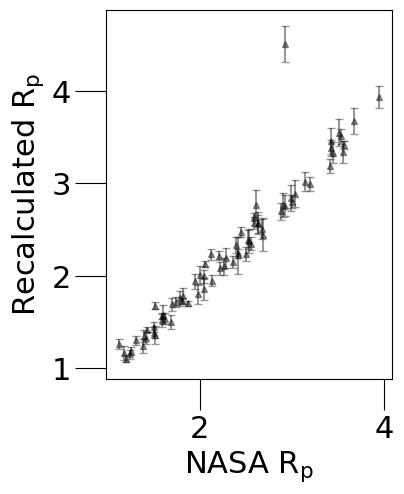

[[0.11324968948038805, 0], [0.024695968091223097, 1], [0.034147947010471746, 2], [0.04093407625362788, 3], [0.05303098546230345, 4], [0.06962540444579868, 5], [0.053187046211547795, 7], [0.1600857142199703, 8], [0.05295010847666615, 9], [0.11264493700116196, 10], [0.26039334048993057, 11], [0.23613474090310227, 12], [0.22782508341745844, 13], [0.12231573808324958, 14], [0.05357800621654851, 15], [0.05711985985857426, 16], [0.028499830778463187, 17], [0.05186219766251021, 18], [0.04949303593614429, 19], [0.09107510608716796, 21], [0.08244857372898995, 22], [0.02370115354732638, 23], [0.028840451990251648, 26], [0.07938079456372327, 28], [0.03106071003233346, 29], [0.09867753072128038, 30], [0.02549381347996449, 31], [0.10506701646735461, 32], [0.1122997080032535, 33], [0.14608491349169306, 34], [0.03824159913592706, 35], [0.06136496106145373, 36], [0.14903371730570236, 37], [0.017329065765931517, 38], [0.04477432154918404, 39], [0.14858880277107378, 40], [0.030309537327155578, 41], [0.0

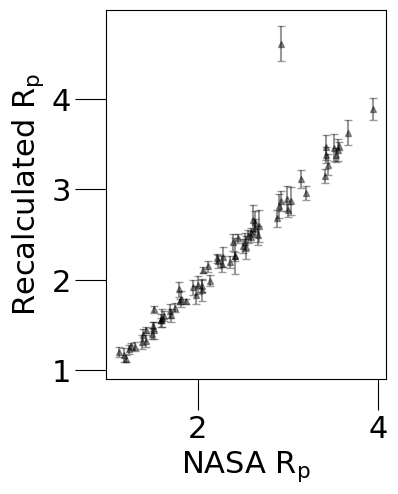

[[0.09701374008519914, 0], [0.06079966789069391, 2], [0.0914185860208434, 3], [0.10710322555544627, 4], [0.06970613388948044, 5], [0.046219124708201775, 7], [0.16057182405577541, 8], [0.041008406441556344, 9], [0.11272525072893469, 10], [0.19670770292940132, 11], [0.17630593322462973, 12], [0.17187229128665704, 13], [0.1183059698920621, 14], [0.03476288882650569, 15], [0.052019739378107, 16], [0.04367046665526608, 17], [0.07911085810522378, 18], [0.05056851566751508, 19], [0.08479442062841258, 21], [0.07634418832383894, 22], [0.015494949166929839, 26], [0.23088375939941086, 28], [0.1161655815449647, 30], [0.017062769348561657, 31], [0.05640679946884841, 32], [0.11086795202234079, 33], [0.14412949507142203, 34], [0.0460953864804714, 35], [0.06369350508651461, 36], [0.15916816178139248, 37], [0.022409698971682435, 39], [0.14540228854168502, 40], [0.03783599197341925, 41], [0.12290463472204971, 43], [0.052721771458426936, 44], [0.019934554096653123, 45], [0.08530529703529299, 46], [0.0966

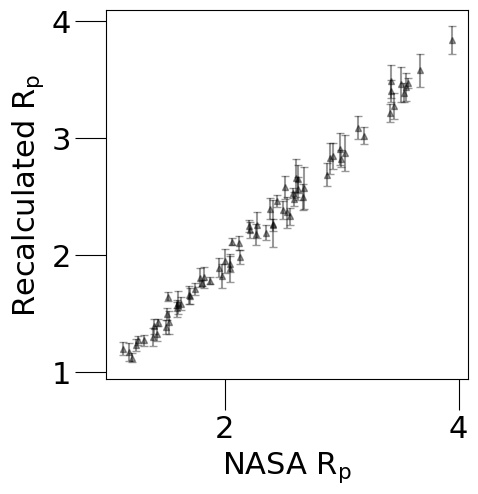

In [7]:
import planet_utils as plu
rp_new_gsp = plu.new_r(full, 'radPhot_gsp')
rp_new_msc = plu.new_r(full, 'radPhot_msc')
rp_new_nasa = plu.new_r(full, 'radPhot_nasa')
rp_new_sc = plu.new_r(full, 'radPhot_sc')
rp_old = full['pl_rade']

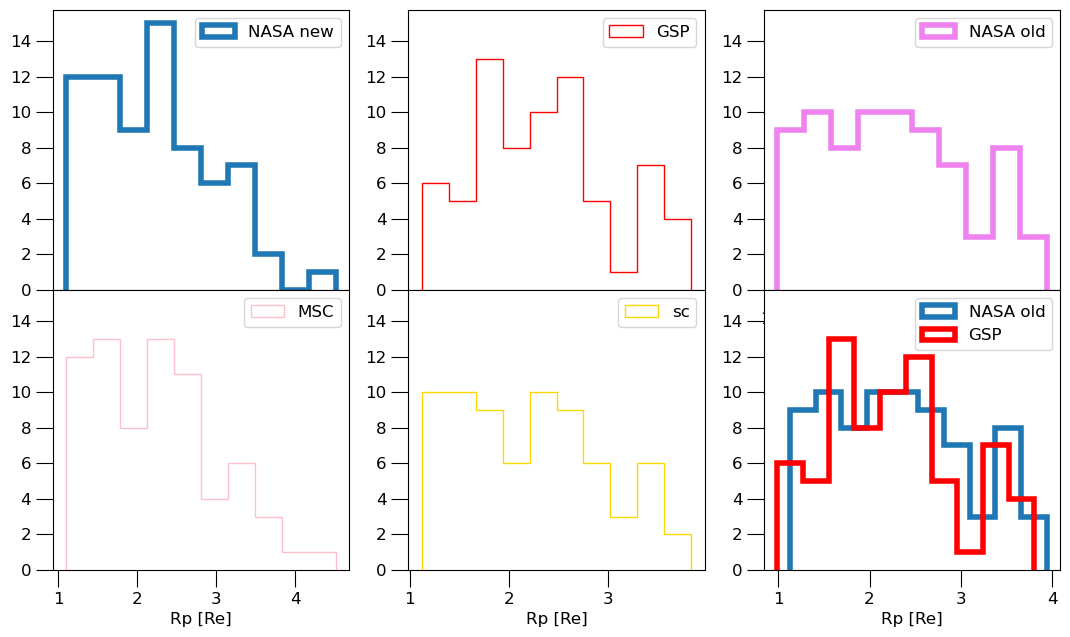

In [16]:

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (13,7))

plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'xtick.major.size': 12})
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.major.size': 12})
plt.rcParams.update({'ytick.labelsize':12})

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)

ax[0,0].hist(rp_new_nasa, histtype='step', label = 'NASA new', linewidth=4, bins = 10)
ax[0,0].set_xticks([])
ax[0,0].legend()
plt.setp(ax, ylim=ax[0,0].get_ylim())

ax[0,1].hist(rp_new_gsp, histtype='step', label = 'GSP', color = 'red', bins = 10)
ax[0,1].set_xticks([])
ax[0,1].legend()

ax[1,0].hist(rp_new_msc, histtype='step', label = 'MSC', color = 'pink', bins = 10)
ax[1,0].set_xlabel('Rp [Re]')
ax[1,0].legend()


ax[1,1].hist(rp_new_sc, histtype='step', label = 'sc', color = 'gold', bins = 10)
ax[1,1].set_xlabel('Rp [Re]')
ax[1,1].legend()

ax[0,2].hist(rp_old, histtype='step', label = 'NASA old', color = 'violet', linewidth=4, bins = 10)
ax[0,2].set_xlabel('Rp [Re]')
ax[0,2].legend()


ax[1,2].hist(rp_old, histtype='step', label = 'NASA old', linewidth=4, bins = 10)
ax[1,2].hist(rp_new_gsp, histtype='step', label = 'GSP', linewidth=4,  color = 'red', bins = 10)
ax[1,2].set_xlabel('Rp [Re]')
ax[1,2].legend()


plt.savefig('1d_valley_comp.pdf')

plt.show()

In [37]:
rp_new_sc

3      1.777986
5      1.591993
7      1.889200
10     1.199706
12     1.171911
         ...   
166    2.253177
167    2.645034
168         NaN
173    1.758844
174    1.919334
Length: 62, dtype: float64

In [38]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'xtick.major.size': 20})
plt.rcParams.update({'xtick.labelsize': 20})
plt.rcParams.update({'ytick.major.size': 20})
plt.rcParams.update({'ytick.labelsize': 20})

plt.errorbar(p['st_mass'], p['teff_msc1'], yerr=[p['teff_msc1']-p['teff_msc1_lower'],p['teff_msc1_upper']-p['teff_msc1']], ls='none',ms=4, marker='o',label = 'Gaia Value', color='k', markerfacecolor='grey')
#plt.scatter(p['st_mass'], p['teff_msc1_lower'],s=1, label = 'Lower')
#plt.scatter(p['st_mass'], p['teff_msc1_upper'],s=1, label = 'Upper')
plt.legend()
plt.xlabel(r'M$_{\rm{s}}$ [M$_{\odot}$]')
plt.ylabel(r'T$_{\rm{eff}}$ [K]')
plt.tight_layout()

plt.savefig('MSC_teff_bounds.png')

plt.show()

NameError: name 'p' is not defined

In [39]:
gaia_input = pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_gaia_spec.ascii', delim_whitespace=True)
sc_input = pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_sc.ascii',delim_whitespace=True)
nasa_input = pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_nasa.ascii',delim_whitespace=True)

output_gaia  = pd.read_table('/Users/afw2/BASTA/Paper1/output/gaia_spec/results.ascii',delim_whitespace=True)
output_sc  = pd.read_table('/Users/afw2/BASTA/Paper1/output/sc/results.ascii',delim_whitespace=True)
output_nasa = pd.read_table('/Users/afw2/BASTA/Paper1/output/nasa/results.ascii', delim_whitespace=True)
nasa = pd.read_csv('/Users/afw2/BASTA/Paper1/data/gaia_phs_tm.csv')

In [40]:
joined_for_analysis = pd.merge(output_gaia, output_nasa, on='#starid', suffixes=('_gaia', '_nasa'))
joined_for_analysis = pd.merge(joined_for_analysis, output_sc, on='#starid', suffixes=('a', '_sc'))

joined_for_analysis = pd.merge(nasa, joined_for_analysis, left_on='gaia_id', right_on='#starid')
print(len(joined_for_analysis))

final_idx = (joined_for_analysis['rv_flag'] == 1) * (joined_for_analysis['tran_flag'] == 1) * (joined_for_analysis['pl_bmassprov'] == 'Mass') * (joined_for_analysis['pl_rade'] <= 4)
intermediate = joined_for_analysis[final_idx]
error_cut_idx = (intermediate['pl_bmasseerr1'] / intermediate['pl_bmasse'] <= 0.25) * (intermediate['pl_radeerr1'] / intermediate['pl_rade'] <= 0.25)
full_analysis = intermediate[error_cut_idx]
print(len(full_analysis))

220
90


In [41]:
ap = pd.read_csv('/Users/afw2/BASTA/Paper1/data/gaia_phs_tm_ap.csv')
print(len(ap))

ap  =  ap[ap['teff_msc1'].notna()]
ap  =  ap[ap['mh_msc'].notna()]

len(ap)

3690


/Users/afw2/.conda/envs/Galpy_first_look/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (704) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


3621

In [42]:
names = full_analysis['pl_name']
names.to_csv('/Users/afw2/BASTA/paper1/data/planet_names.csv')
full_analysis

,nea_dr3_tm_joiner_oid,gaia_id,ra_2_tm_join,dec_2_tm_join,parallax_tm_join,original_ext_source_id,clean_tmass_psc_xsc_oid,ra_tm,dec_tm,err_maj,...,FeH_errp,radPhot,radPhot_errm,radPhot_errp,massfin,massfin_errm,massfin_errp,age,age_errm,age_errp
3,1566,704967037090946688,133.146761,28.329783,79.448184,08523579+2819509,375532653,133.149142,28.330822,0.16,...,0.0500,0.895625,0.059988,0.035923,0.939154,0.065068,0.077876,6700.0,11000.0,6340.0
7,1263,2582617711154563968,13.080033,10.794705,4.085427,00521914+1047409,325722073,13.079774,10.794715,0.07,...,0.0377,0.929632,0.046094,0.035880,0.893741,0.050036,0.032311,11200.0,4700.0,6400.0
9,654,6259263137059042048,228.248237,-16.724652,3.094682,15125956-1643282,236003375,228.248183,-16.724506,0.06,...,0.0000,1.665383,0.065373,0.061414,1.047932,0.026254,0.023593,10400.0,900.0,800.0
10,654,6259263137059042048,228.248237,-16.724652,3.094682,15125956-1643282,236003375,228.248183,-16.724506,0.06,...,0.0000,1.665383,0.065373,0.061414,1.047932,0.026254,0.023593,10400.0,900.0,800.0
11,654,6259263137059042048,228.248237,-16.724652,3.094682,15125956-1643282,236003375,228.248183,-16.724506,0.06,...,0.0000,1.665383,0.065373,0.061414,1.047932,0.026254,0.023593,10400.0,900.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,148,5880886001621564928,222.165457,-57.588888,15.652877,14483982-5735175,58400811,222.165921,-57.588219,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,427,5023809953208388352,28.715807,-29.421706,4.434682,01545169-2925186,182322912,28.715380,-29.421835,0.07,...,0.0501,0.871257,0.031746,0.023237,0.929029,0.049732,0.070562,5200.0,9100.0,4900.0
217,751,2613413008919918976,331.203094,-12.019073,3.700977,22044873-1201079,253198200,331.203047,-12.018885,0.07,...,0.1500,1.105959,0.045137,0.044791,1.021773,0.034556,0.057092,9400.0,4100.0,2200.0
218,751,2613413008919918976,331.203094,-12.019073,3.700977,22044873-1201079,253198200,331.203047,-12.018885,0.07,...,0.1500,1.105959,0.045137,0.044791,1.021773,0.034556,0.057092,9400.0,4100.0,2200.0


<ipython-input-43-f0482bcf3755>:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)


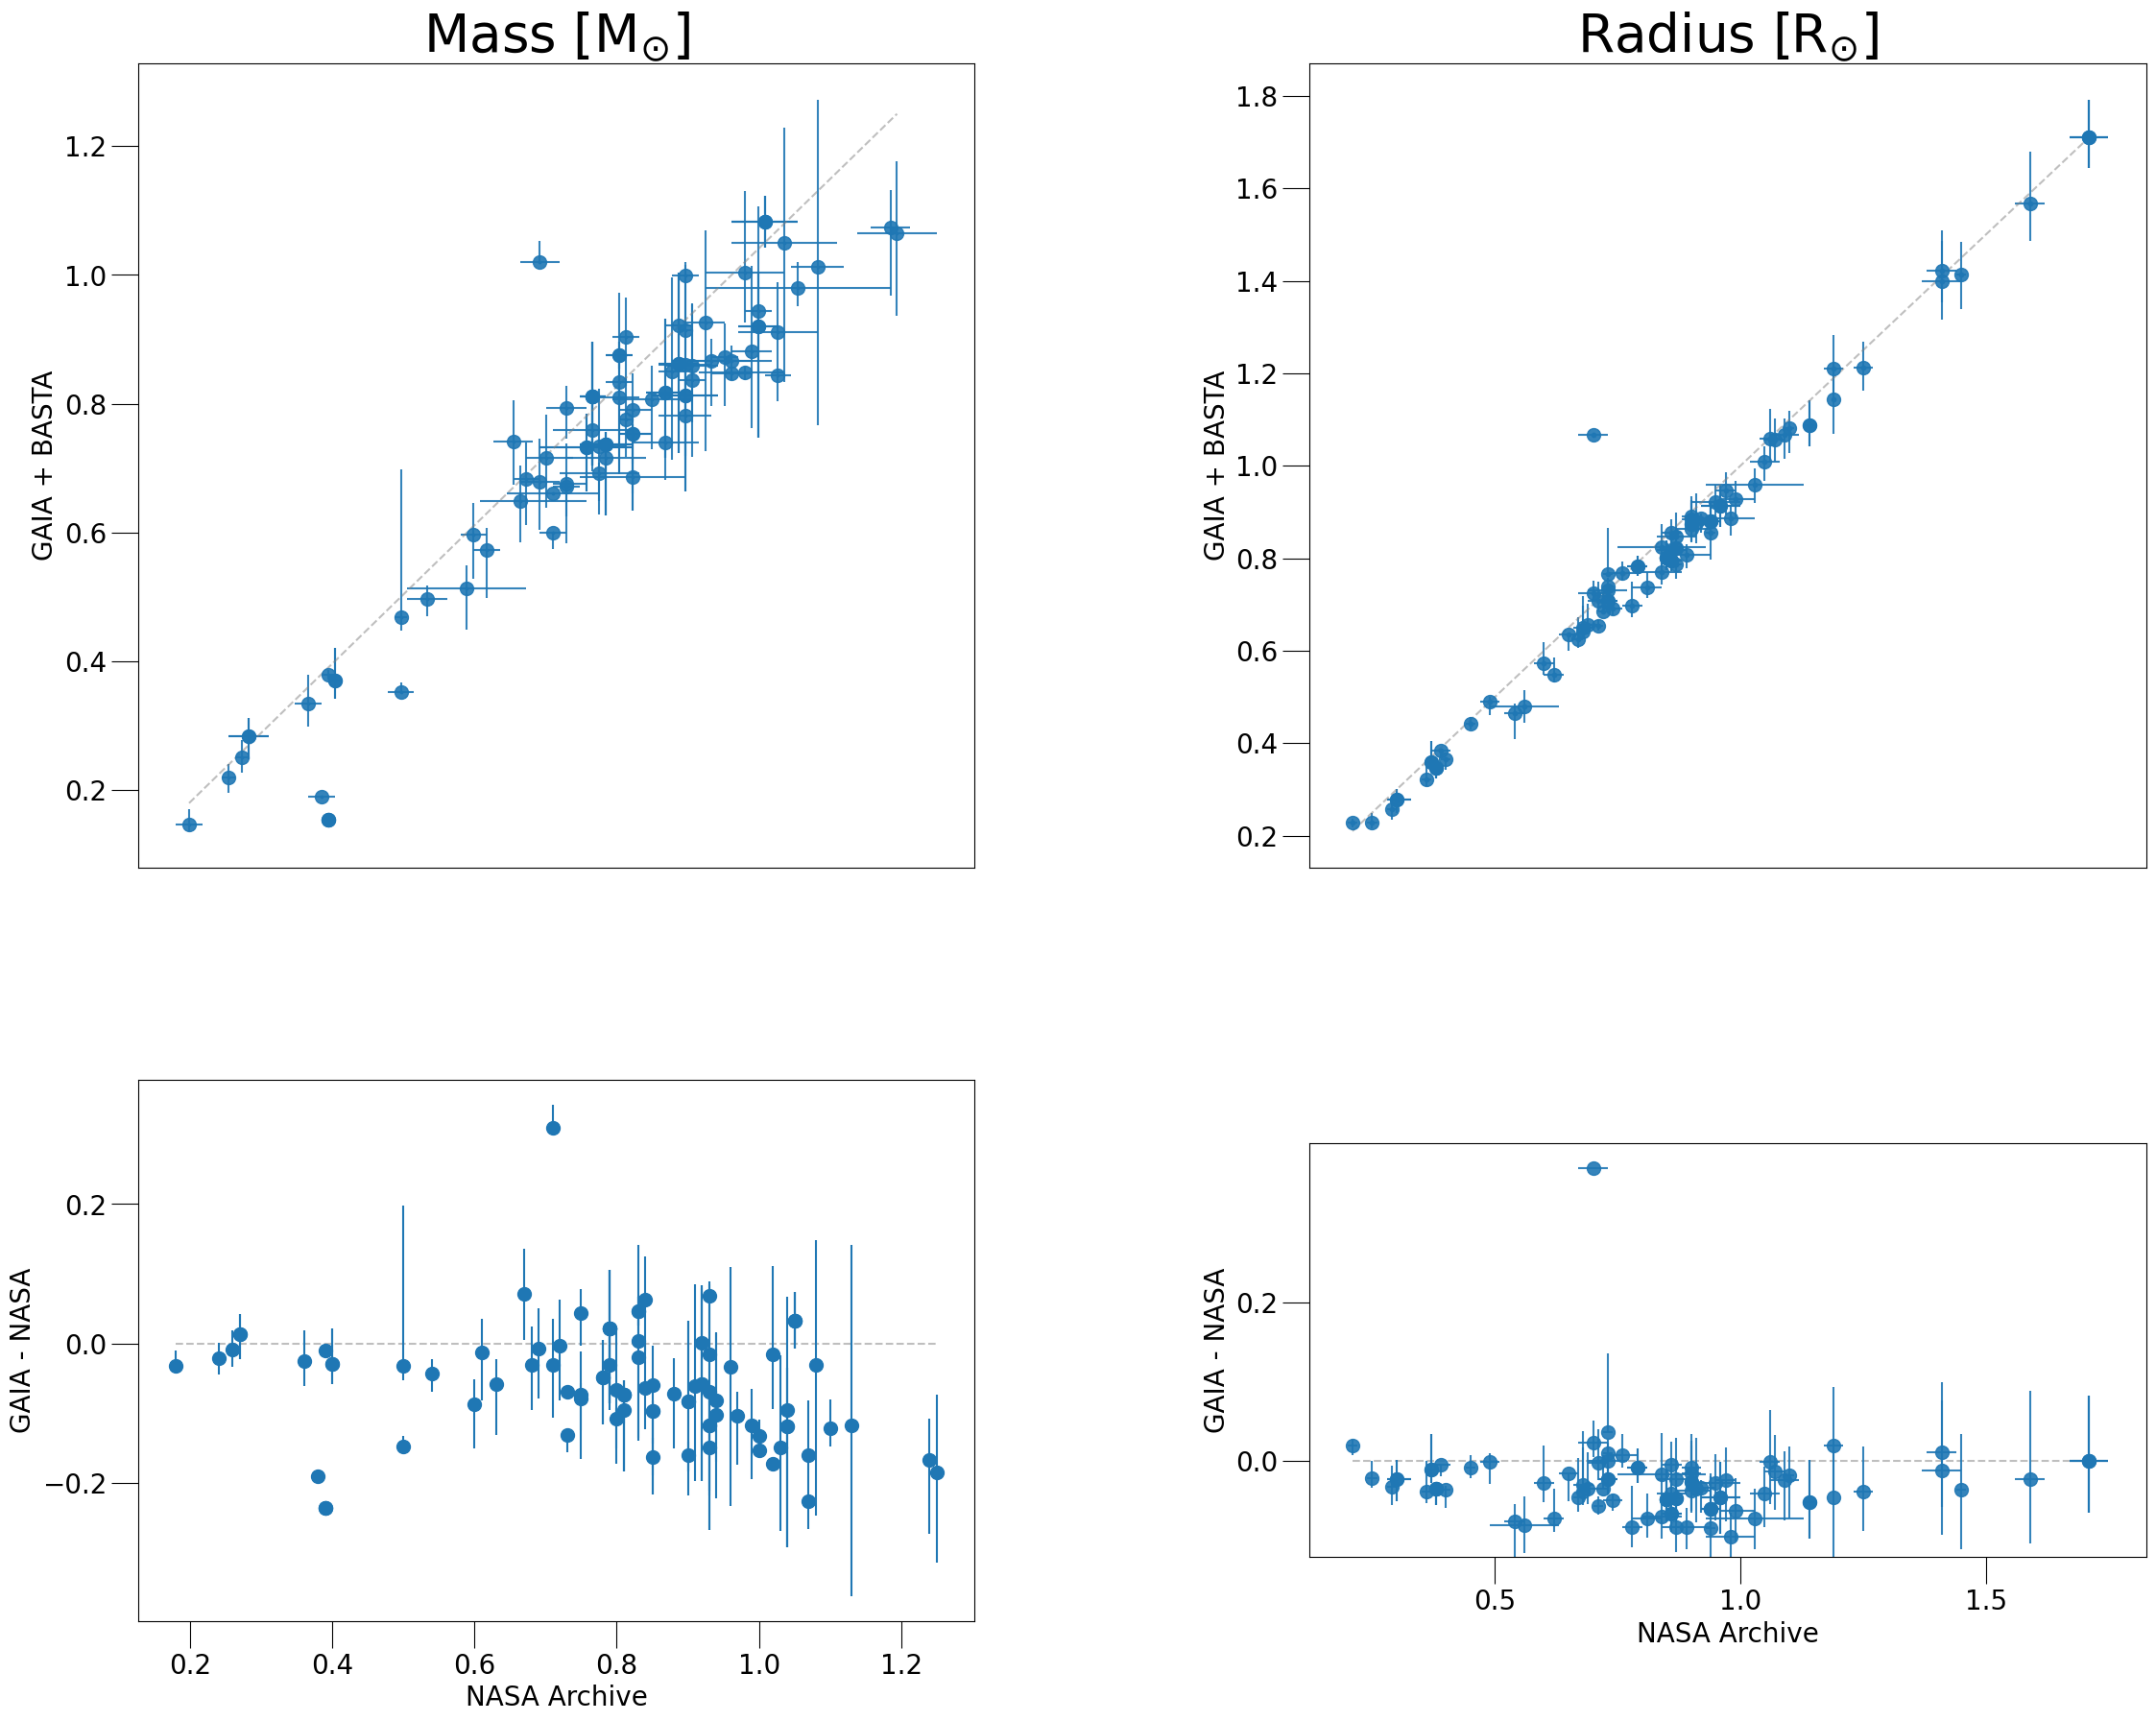

In [43]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(27,22), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)

plt.rcParams.update({'font.size': 33})
plt.rcParams.update({'xtick.major.size': 33})
plt.rcParams.update({'xtick.labelsize': 33})
plt.rcParams.update({'ytick.major.size': 33})
plt.rcParams.update({'ytick.labelsize': 33})



df = full_analysis
plt.style.use('dark_background')


ax[0,0].set_title('Mass [M$_{\odot}$]')
ax[0,0].scatter(df['st_mass'], df['massfin_gaia'], s=3)

yerr00 = [np.array(df['massfin_errm_gaia']),np.array(df['massfin_errp_gaia'])]
xerr00 = [-np.array(df['st_masserr2']),np.array(df['st_masserr1'])]

ax[0,0].errorbar(df['st_mass'], df['massfin_gaia'], yerr=yerr00, xerr=xerr00, marker='o', ms=10, ls='none', alpha=0.9)

y = np.linspace(min(df['st_mass']),max(df['st_mass']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('GAIA + BASTA')
ax[0,0].set_xticks([])

x = np.linspace(min(df['st_mass']),max(df['st_mass']), 100)
y = np.linspace(0,0, 100)




ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], marker='o', ls='none', yerr=yerr00, ms=10)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,0].set_ylabel('GAIA - NASA')
ax[1,0].set_xlabel('NASA Archive')

range = max(df['st_mass'])-min(df['st_mass'])
residual = df['massfin_gaia']-df['st_mass']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################

ax[0,1].set_title('Radius [R$_{\odot}$]')
ax[0,1].scatter(df['st_rad'], df['radPhot_gaia'], s=10)

yerr01 = [np.array(df['radPhot_errm']),np.array(df['radPhot_errp_gaia'])]
xerr01 = [-np.array(df['st_raderr2']),np.array(df['st_raderr1'])]

ax[0,1].errorbar(df['st_rad'], df['radPhot_gaia'], yerr=yerr01, xerr=xerr01, marker='o', ms=10, ls='none', alpha=0.9)

y = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
x = y

ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,1].set_ylabel('GAIA + BASTA')
ax[0,1].set_xticks([])

x = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
y = np.linspace(0,0, 100)




ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

#ax[1,1].scatter(df['st_rad'], df['radPhot_gaia']-df['st_rad'], s=3)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,1].errorbar(df['st_rad'], df['radPhot_gaia']-df['st_rad'], yerr=yerr01, xerr=xerr01, marker='o', ms = 10, ls='none', alpha=0.9)
ax[1,1].set_ylabel('GAIA - NASA')
ax[1,1].set_xlabel('NASA Archive')

range = max(df['st_rad'])-min(df['st_rad'])
residual = df['radPhot_gaia']-df['st_rad']
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))


############################################################################################################

############################################################################################################
plt.savefig('basta_nasa_params.png')
plt.show()

<ipython-input-44-b6bef9f0ee9b>:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)


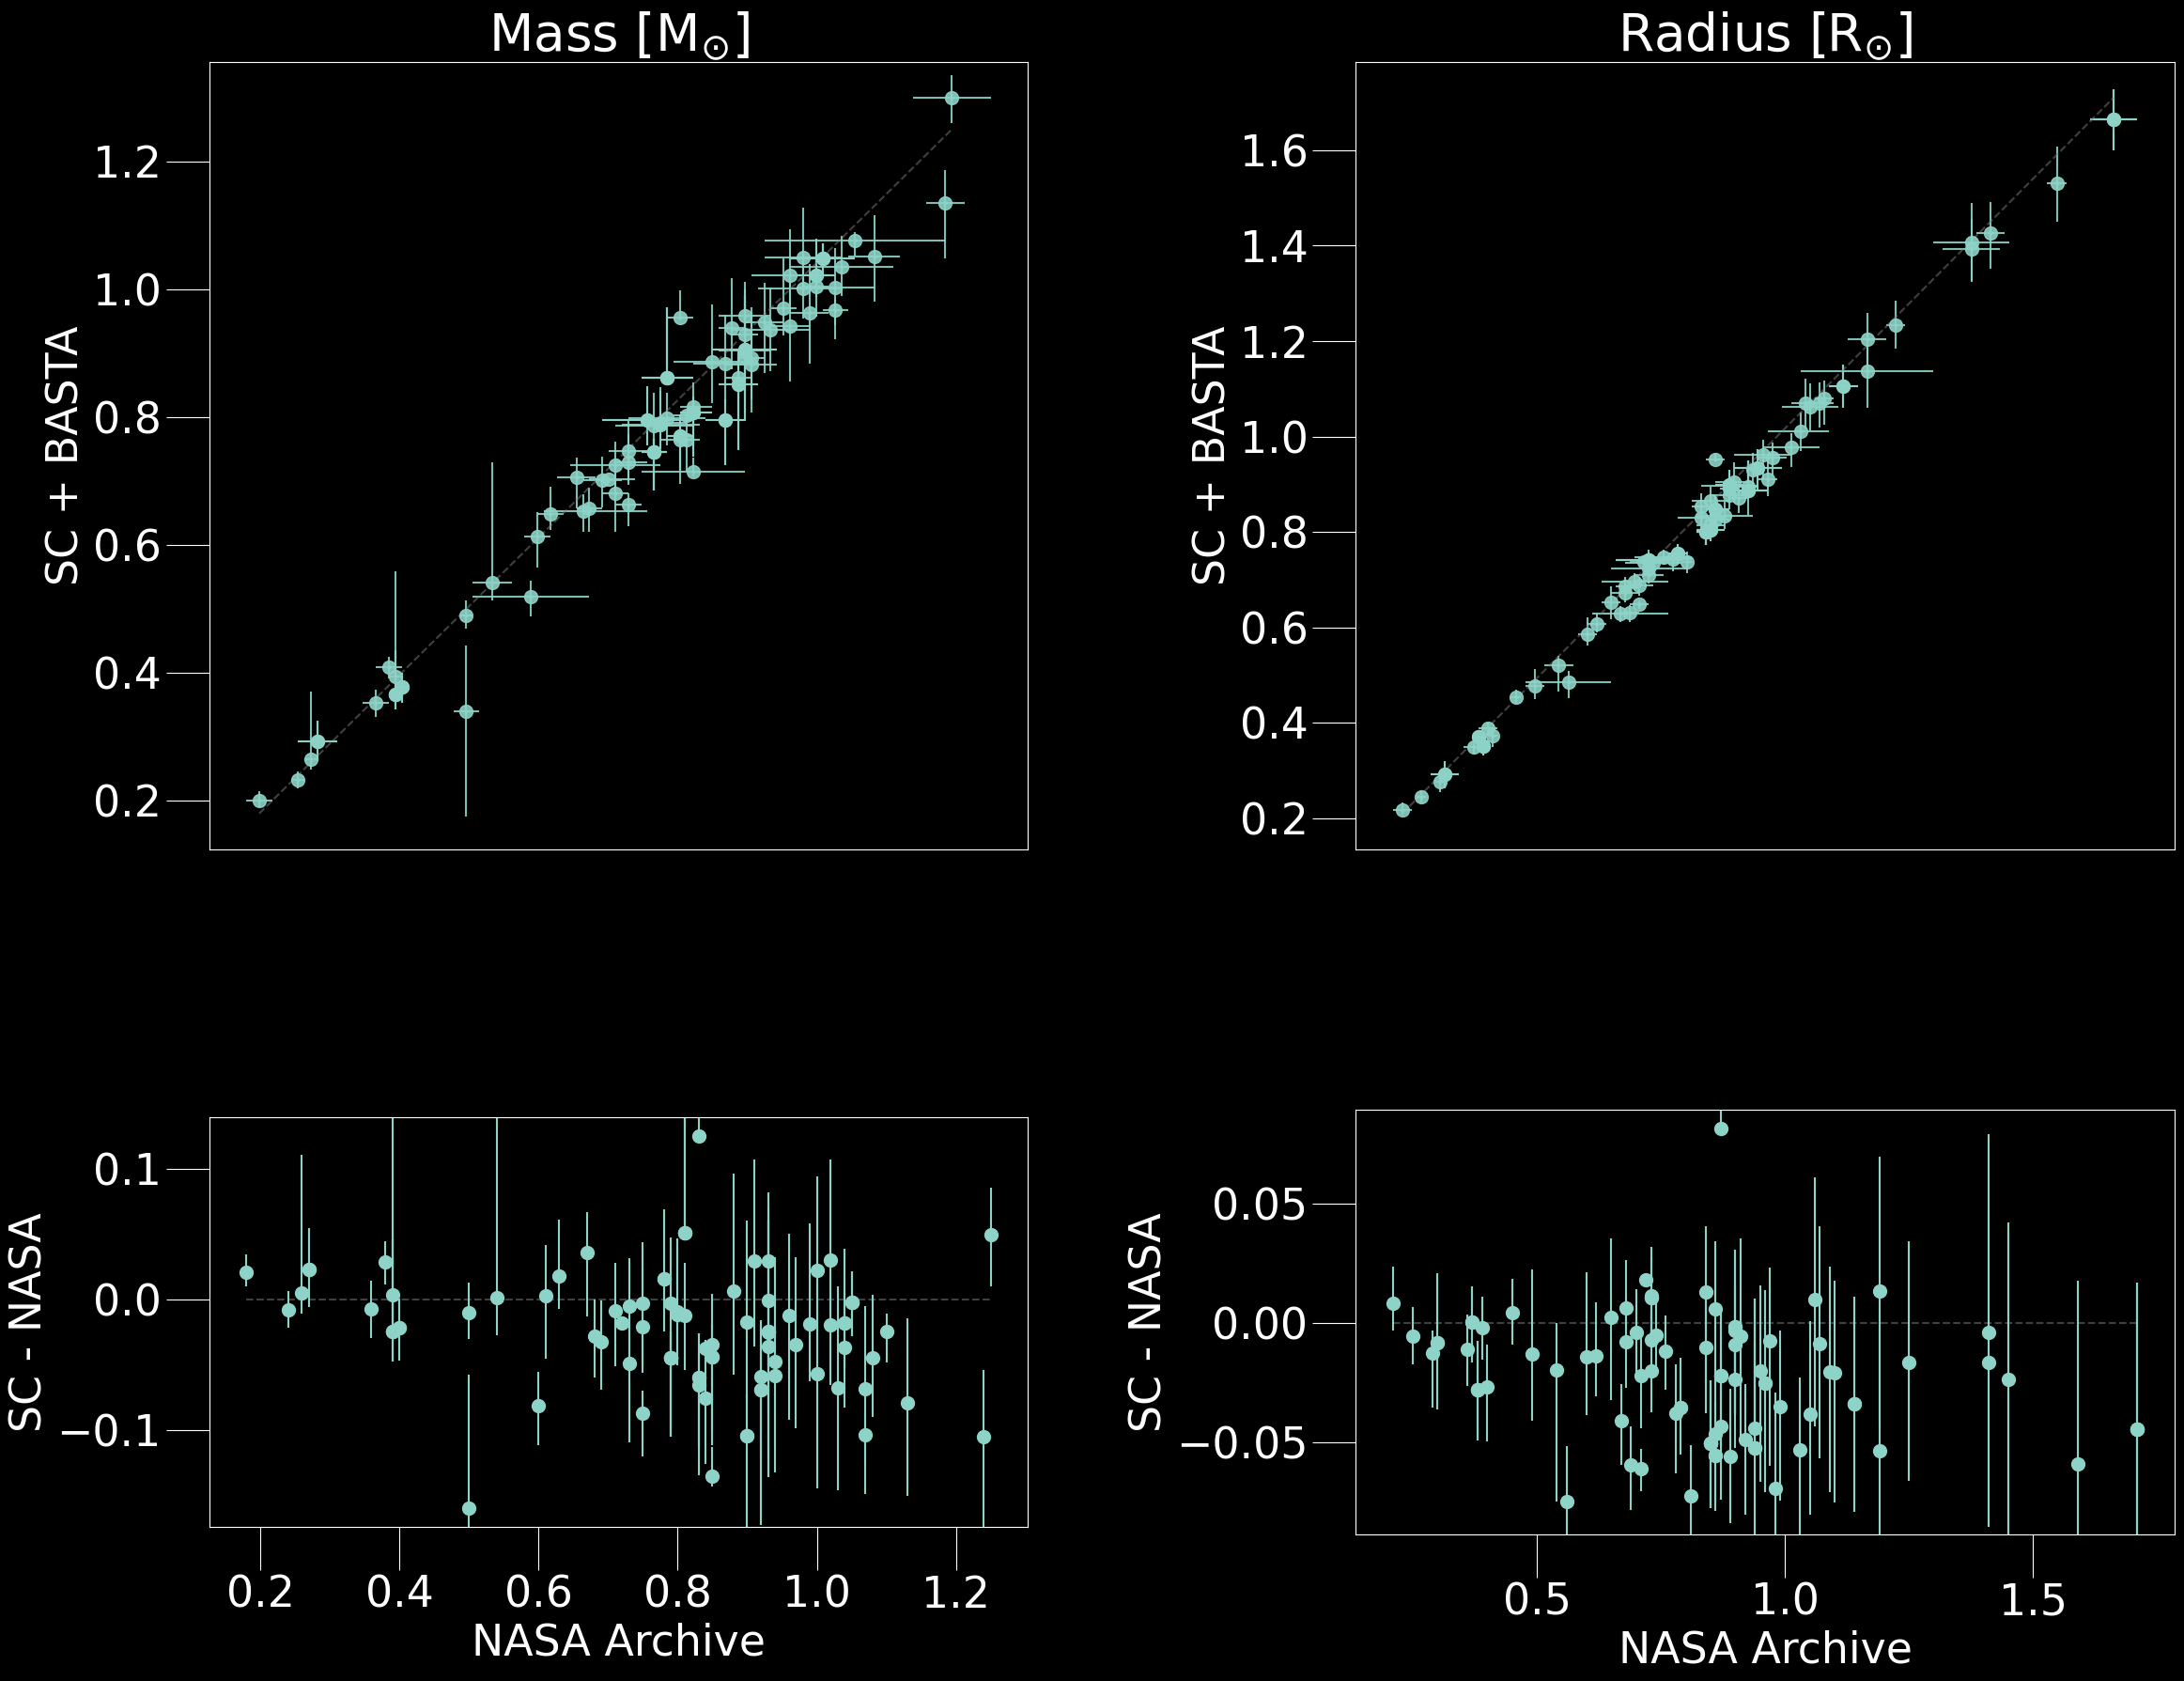

In [44]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(27,22), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)

plt.rcParams.update({'font.size': 33})
plt.rcParams.update({'xtick.major.size': 33})
plt.rcParams.update({'xtick.labelsize': 33})
plt.rcParams.update({'ytick.major.size': 33})
plt.rcParams.update({'ytick.labelsize': 33})



df = full_analysis
plt.style.use('dark_background')


ax[0,0].set_title('Mass [M$_{\odot}$]')
ax[0,0].scatter(df['st_mass'], df['massfin'], s=3)

yerr00 = [np.array(df['massfin_errm']),np.array(df['massfin_errp'])]
xerr00 = [-np.array(df['st_masserr2']),np.array(df['st_masserr1'])]

ax[0,0].errorbar(df['st_mass'], df['massfin'], yerr=yerr00, xerr=xerr00, ms=10, marker='o', ls='none', alpha=0.9)

y = np.linspace(min(df['st_mass']),max(df['st_mass']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('SC + BASTA')
ax[0,0].set_xticks([])

x = np.linspace(min(df['st_mass']),max(df['st_mass']), 100)
y = np.linspace(0,0, 100)




ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].errorbar(df['st_mass'], df['massfin']-df['st_mass'], yerr=yerr00, ms=10, marker='o', ls='none')
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,0].set_ylabel('SC - NASA')
ax[1,0].set_xlabel('NASA Archive')

range = max(df['st_mass'])-min(df['st_mass'])
residual = df['massfin']-df['st_mass']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################

ax[0,1].set_title('Radius [R$_{\odot}$]')
ax[0,1].scatter(df['st_rad'], df['radPhot'], s=3)

yerr01 = [np.array(df['radPhot_errm']),np.array(df['radPhot_errp'])]
xerr01 = [-np.array(df['st_masserr2']),np.array(df['st_masserr1'])]

ax[0,1].errorbar(df['st_rad'], df['radPhot'], yerr=yerr01, xerr=xerr01, ms=10, marker='o', ls='none', alpha=0.9)

y = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
x = y

ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,1].set_ylabel('SC + BASTA')
ax[0,1].set_xticks([])

x = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
y = np.linspace(0,0, 100)




ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,1].errorbar(df['st_rad'], df['radPhot']-df['st_rad'], yerr = yerr01, ms=10, marker='o', ls='none')
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,1].set_ylabel('SC - NASA')
ax[1,1].set_xlabel('NASA Archive')

range = max(df['st_rad'])-min(df['st_rad'])
residual = df['radPhot']-df['st_rad']
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))


############################################################################################################

############################################################################################################
plt.savefig('basta_sc_nasa_params.png')
plt.show()

<ipython-input-45-be85e9ef4675>:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.1)


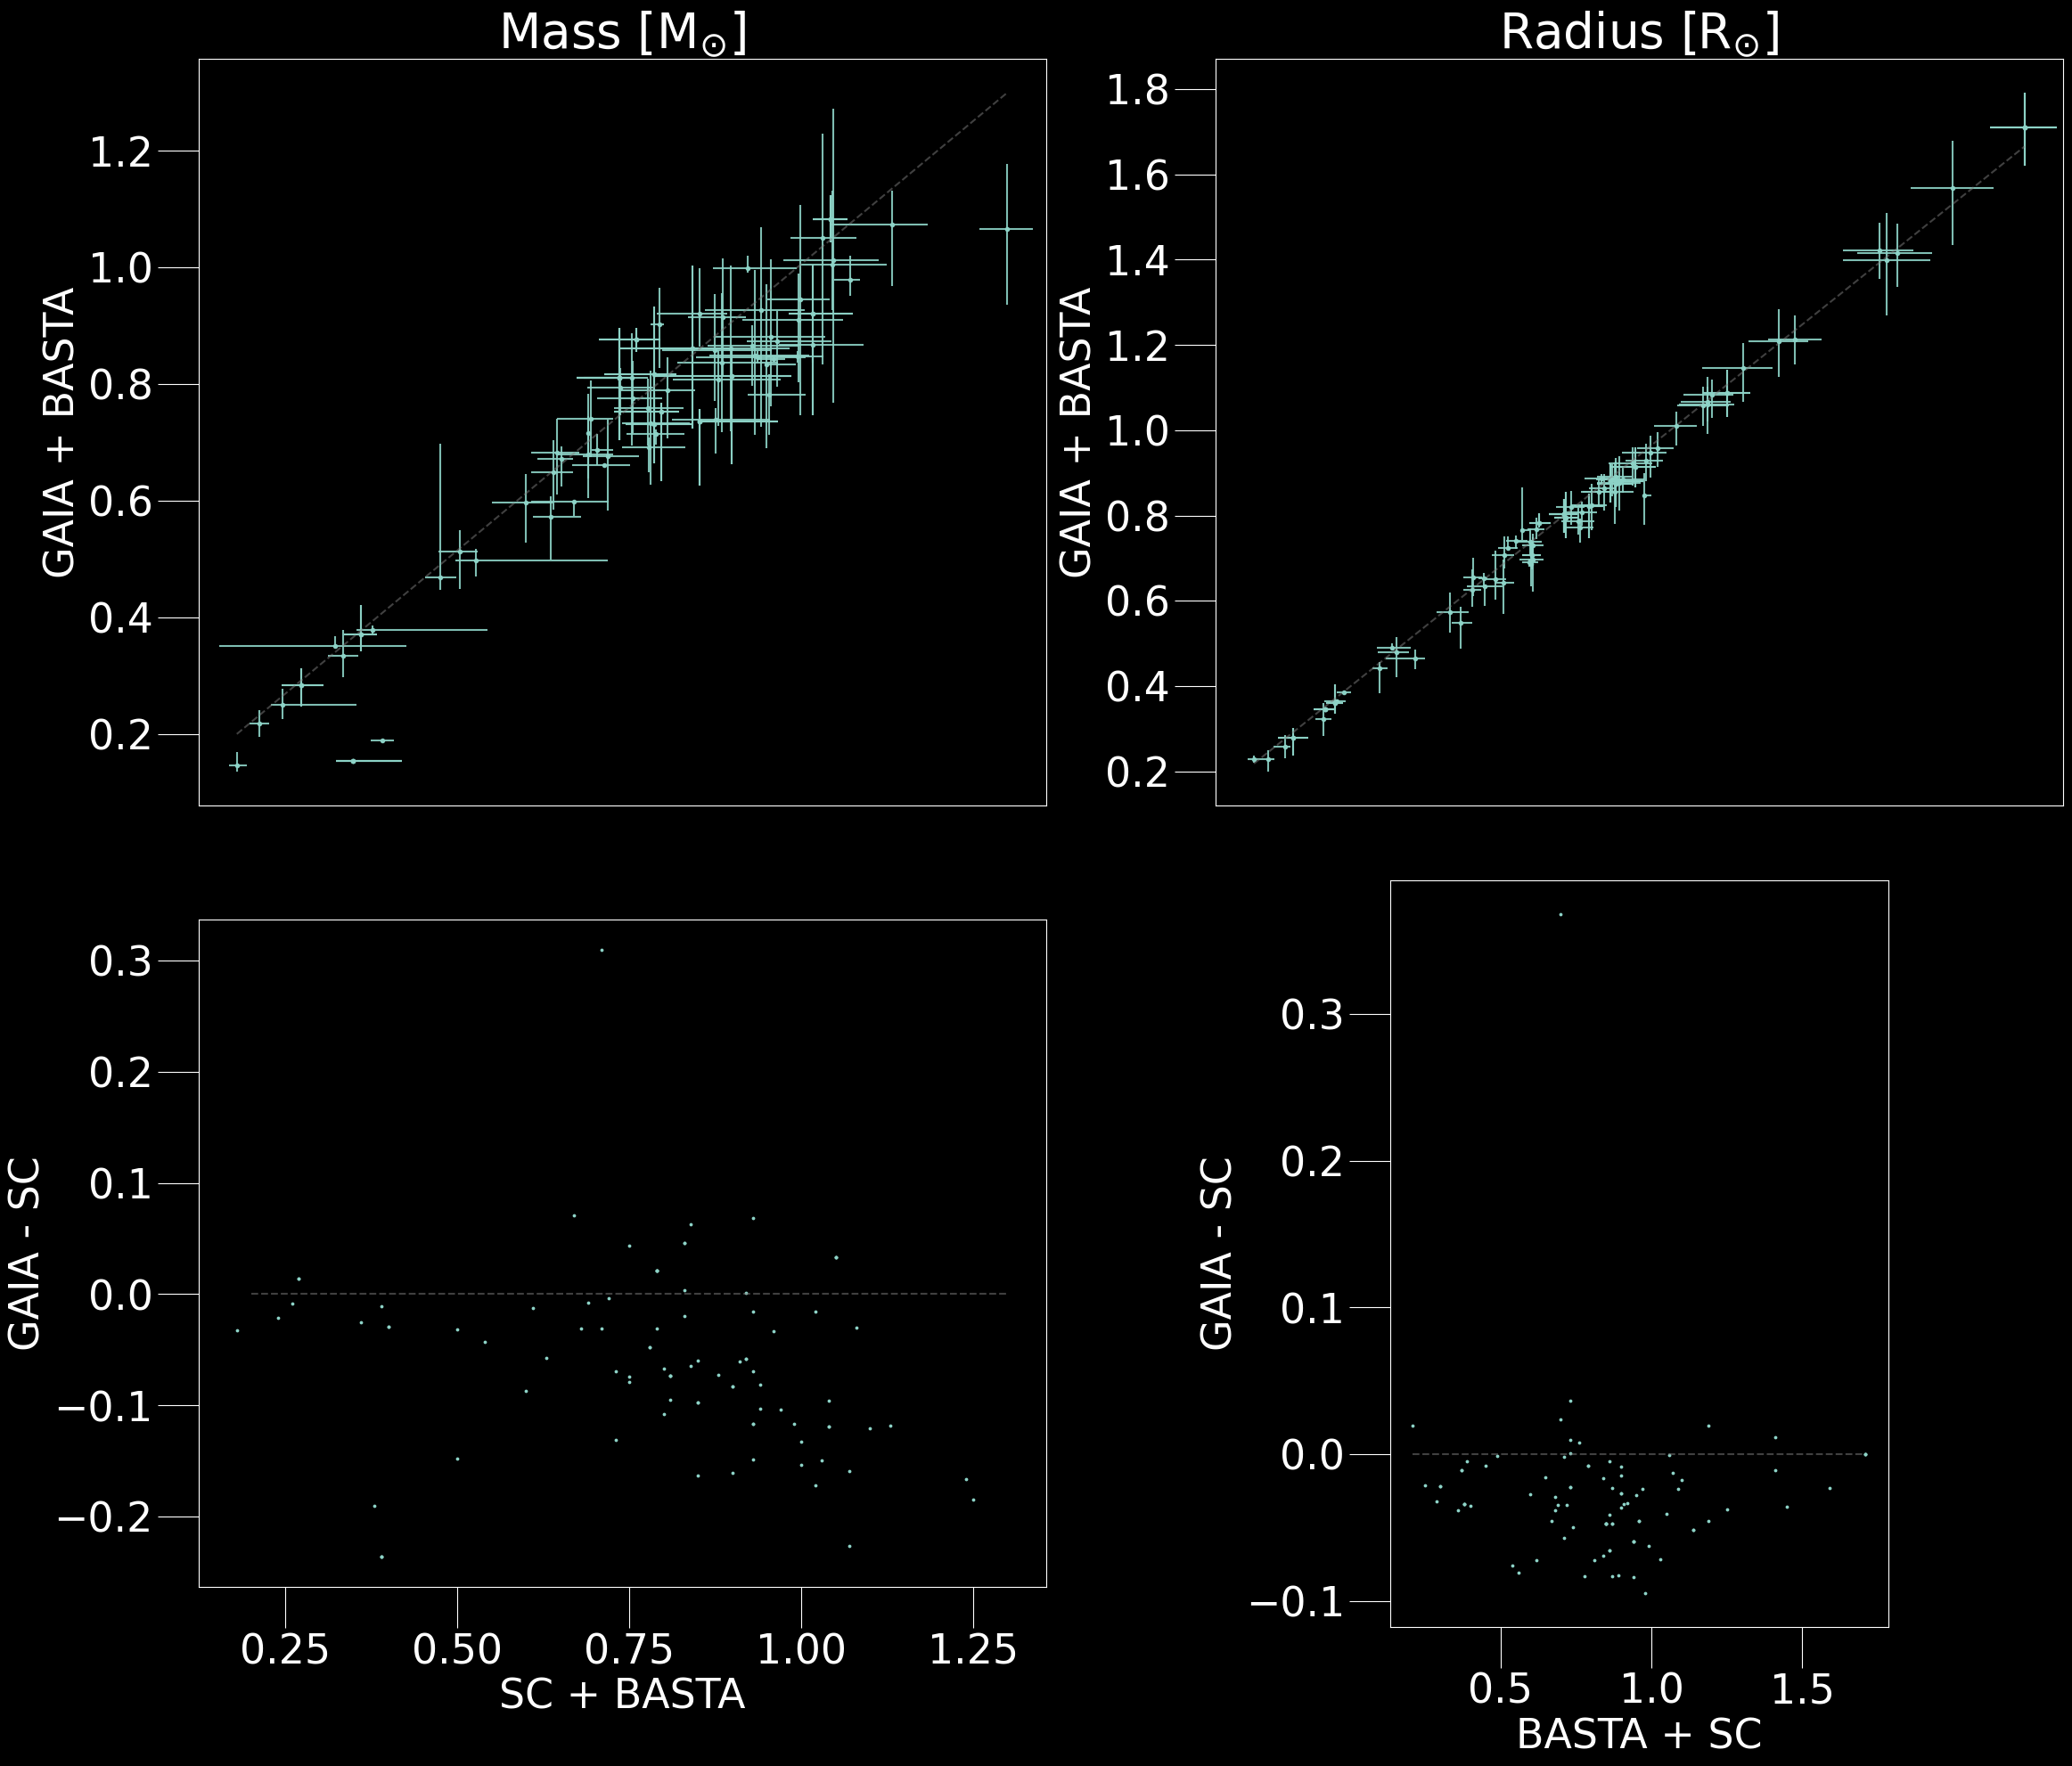

In [45]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(27,22), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.1)

plt.rcParams.update({'font.size': 33})
plt.rcParams.update({'xtick.major.size': 33})
plt.rcParams.update({'xtick.labelsize': 33})
plt.rcParams.update({'ytick.major.size': 33})
plt.rcParams.update({'ytick.labelsize': 33})



df = full_analysis
plt.style.use('dark_background')


ax[0,0].set_title('Mass [M$_{\odot}$]')
ax[0,0].scatter(df['massfin'], df['massfin_gaia'], s=3)

yerr00 = [np.array(df['massfin_errm_gaia']),np.array(df['massfin_errp_gaia'])]
xerr00 = [np.array(df['massfin_errm']),np.array(df['massfin_errp'])]

ax[0,0].errorbar(df['massfin'], df['massfin_gaia'], yerr=yerr00, xerr=xerr00, marker='.', ls='none', alpha=0.9)

y = np.linspace(min(df['massfin']),max(df['massfin']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('GAIA + BASTA')
ax[0,0].set_xticks([])

x = np.linspace(min(df['massfin']),max(df['massfin']), 100)
y = np.linspace(0,0, 100)


ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].scatter(df['st_mass'], df['massfin_gaia']-df['st_mass'], s=3)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,0].set_ylabel('GAIA - SC')
ax[1,0].set_xlabel('SC + BASTA')

range = max(df['massfin'])-min(df['massfin'])
residual = df['massfin_gaia']-df['massfin']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################

ax[0,1].set_title('Radius [R$_{\odot}$]')
ax[0,1].scatter(df['radPhot'], df['radPhot_gaia'], s=3)

yerr01 = [np.array(df['radPhot_errm_gaia']),np.array(df['radPhot_errp_gaia'])]
xerr01 = [np.array(df['radPhot_errm']),np.array(df['radPhot_errp'])]

ax[0,1].errorbar(df['radPhot'], df['radPhot_gaia'], yerr=yerr01, xerr=xerr01, marker='.', ls='none', alpha=0.9)

y = np.linspace(min(df['radPhot']),max(df['radPhot']), 100)
x = y

ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,1].set_ylabel('GAIA + BASTA')
ax[0,1].set_xticks([])

x = np.linspace(min(df['st_rad']),max(df['st_rad']), 100)
y = np.linspace(0,0, 100)




ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,1].scatter(df['st_rad'], df['radPhot_gaia']-df['st_rad'], s=3)
#ax[1,0].errorbar(df['st_mass'], df['massfin_gaia']-df['st_mass'], yerr =  s=3)
ax[1,1].set_ylabel('GAIA - SC')
ax[1,1].set_xlabel('BASTA + SC')

range = max(df['radPhot'])-min(df['radPhot'])
residual = df['radPhot_gaia']-df['radPhot']
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))


############################################################################################################

############################################################################################################
plt.savefig('basta_gaia_sc_params.png')
plt.show()

In [46]:
input_gaia= pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_gaia_phot.ascii', delim_whitespace=True)
input_sc= pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_sc.ascii', delim_whitespace=True)
input_nasa= pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_nasa.ascii', delim_whitespace=True)


gaia_input_out = pd.merge(output_gaia, input_gaia, on='#starid')
sc_input_out = pd.merge(output_sc, input_sc, on='#starid')
nasa_input_out = pd.merge(output_nasa, input_nasa, on='#starid')

print(nasa_input_out.keys())
print(gaia_input_out.keys())

fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(25,10), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)


ax[0,0].set_title('Input Teff [K]')
ax[0,0].scatter(gaia_input_out['Teff_y'], sc_input_out['Teff_y'], s=3)

y = np.linspace(min(gaia_input_out['Teff_y']),max(gaia_input_out['Teff_y']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('SC')
ax[0,0].set_xticks([])


x = np.linspace(min(gaia_input_out['Teff_y']),max(gaia_input_out['Teff_y']), 100)
y = np.linspace(0,0, 100)
ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].scatter(gaia_input_out['Teff_y'], gaia_input_out['Teff_y']-sc_input_out['Teff_y'], s=3)
ax[1,0].set_ylabel('GAIA - SC')
ax[1,0].set_xlabel('Gaia')

range = max(gaia_input_out['Teff_y'])-min(gaia_input_out['Teff_y'])
residual = gaia_input_out['Teff_y']-sc_input_out['Teff_y']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################


ax[0,1].set_title('Output Teff [K]')


y = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
x = y
ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)


ax[0,1].scatter(gaia_input_out['Teff_x'], sc_input_out['Teff_x'], s=3)
ax[0,1].set_xticks([])
ax[0,1].set_ylabel('SC')


ax[1,1].scatter(gaia_input_out['Teff_x'], gaia_input_out['Teff_x']-sc_input_out['Teff_x'], s=3)
ax[1,1].set_ylabel('GAIA - SC')
ax[1,1].set_xlabel('Gaia')

x = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
y = np.linspace(0,0, 100)
ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

range = max(gaia_input_out['Teff_x'])-min(gaia_input_out['Teff_x'])
residual = gaia_input_out['Teff_x']-sc_input_out['Teff_x']
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))



############################################################################################################



ax[0,2].set_title('Input Teff [K]')
ax[0,2].scatter(gaia_input_out['Teff_y'], nasa_input_out['st_teff'], s=3)

y = np.linspace(min(gaia_input_out['Teff_y']),max(gaia_input_out['Teff_y']), 100)
x = y

ax[0,2].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,2].set_ylabel('NASA')
ax[0,2].set_xticks([])


x = np.linspace(min(gaia_input_out['Teff_y']),max(gaia_input_out['Teff_y']), 100)
y = np.linspace(0,0, 100)
ax[1,2].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,2].scatter(gaia_input_out['Teff_y'], gaia_input_out['Teff_y']-nasa_input_out['st_teff'], s=3)
ax[1,2].set_ylabel('GAIA - NASA')
ax[1,2].set_xlabel('GAIA')

range = max(gaia_input_out['Teff_y'])-min(gaia_input_out['Teff_y'])
residual = gaia_input_out['Teff_y']-nasa_input_out['Teff']
residual_range = max(residual) - min(residual)
ax[1,2].set_aspect(range/(residual_range*2))


############################################################################################################


ax[0,3].set_title('Output Teff [K]')


y = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
x = y
ax[0,3].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)


ax[0,3].scatter(gaia_input_out['Teff_x'], nasa_input_out['Teff'], s=3)
ax[0,3].set_xticks([])
ax[0,3].set_ylabel('NASA')


ax[1,3].scatter(gaia_input_out['Teff_x'], gaia_input_out['Teff_x']-nasa_input_out['Teff'], s=3)
ax[1,3].set_ylabel('GAIA - NASA')
ax[1,3].set_xlabel('Gaia')

x = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
y = np.linspace(0,0, 100)
ax[1,3].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

range = max(gaia_input_out['Teff_x'])-min(gaia_input_out['Teff_x'])
residual = gaia_input_out['Teff_x']-nasa_input_out['Teff']
residual_range = max(residual) - min(residual)
ax[1,3].set_aspect(range/(residual_range*2))

plt.show()

Index(['#starid', 'distance', 'distance_errm', 'distance_errp', 'Teff_x',
       'Teff_errm', 'Teff_errp', 'FeH_x', 'FeH_errm', 'FeH_errp', 'radPhot',
       'radPhot_errm', 'radPhot_errp', 'massfin', 'massfin_errm',
       'massfin_errp', 'age', 'age_errm', 'age_errp', 'RA', 'DEC', 'Teff_y',
       'Teff_err', 'FeH_y', 'FeH_err', 'parallax', 'parallax_err', 'Mj_2MASS',
       'Mj_2MASS_err', 'Mk_2MASS', 'Mk_2MASS_err', 'Mh_2MASS', 'Mh_2MASS_err'],
      dtype='object')
Index(['#starid', 'distance', 'distance_errm', 'distance_errp', 'Teff_x',
       'Teff_errm', 'Teff_errp', 'FeH', 'FeH_errm', 'FeH_errp', 'radPhot',
       'radPhot_errm', 'radPhot_errp', 'massfin', 'massfin_errm',
       'massfin_errp', 'age', 'age_errm', 'age_errp', 'RA', 'DEC', 'Teff_y',
       'Teff_err', 'MeH', 'MeH_err', 'logg', 'logg_err', 'parallax',
       'parallax_err', 'Mj_2MASS', 'Mj_2MASS_err', 'Mk_2MASS', 'Mk_2MASS_err',
       'Mh_2MASS', 'Mh_2MASS_err'],
      dtype='object')


<ipython-input-46-56cb5f272f12>:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)


ValueError: x and y must be the same size

In [47]:
input_gaia= pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_table_g.ascii', delim_whitespace=True)
input_sc= pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_table_s.ascii', delim_whitespace=True)
input_nasa= pd.read_table('/Users/afw2/BASTA/Paper1/data/basta_input_table_n.ascii', delim_whitespace=True)


gaia_input_out = pd.merge(output_gaia, input_gaia, on='#starid')
sc_input_out = pd.merge(output_sc, input_sc, on='#starid')
nasa_input_out = pd.merge(output_nasa, input_nasa, on='#starid')

print(nasa_input_out.keys())
print(gaia_input_out.keys())

fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(25,10), layout='constrained')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)


ax[0,0].set_title('Mass [M_$\{odot}$]')
ax[0,0].scatter(gaia_input_out['massfin'], sc_input_out['massfin'], s=3)

y = np.linspace(min(gaia_input_out['massfin']),max(gaia_input_out['massfin']), 100)
x = y

ax[0,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,0].set_ylabel('SC')
ax[0,0].set_xticks([])


x = np.linspace(min(gaia_input_out['massfin']),max(gaia_input_out['massfin']), 100)
y = np.linspace(0,0, 100)
ax[1,0].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,0].scatter(gaia_input_out['massfin'], gaia_input_out['massfin']-sc_input_out['massfin'], s=3)
ax[1,0].set_ylabel('GAIA - SC')
ax[1,0].set_xlabel('Gaia')

range = max(gaia_input_out['massfin'])-min(gaia_input_out['massfin'])
residual = gaia_input_out['massfin']-sc_input_out['massfin']
residual_range = max(residual) - min(residual)
ax[1,0].set_aspect(range/(residual_range*2))


############################################################################################################


ax[0,1].set_title('Output Teff [K]')


y = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
x = y
ax[0,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)


ax[0,1].scatter(gaia_input_out['Teff_x'], sc_input_out['Teff_x'], s=3)
ax[0,1].set_xticks([])
ax[0,1].set_ylabel('SC')


ax[1,1].scatter(gaia_input_out['Teff_x'], gaia_input_out['Teff_x']-sc_input_out['Teff_x'], s=3)
ax[1,1].set_ylabel('GAIA - SC')
ax[1,1].set_xlabel('Gaia')

x = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
y = np.linspace(0,0, 100)
ax[1,1].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

range = max(gaia_input_out['Teff_x'])-min(gaia_input_out['Teff_x'])
residual = gaia_input_out['Teff_x']-sc_input_out['Teff_x']
residual_range = max(residual) - min(residual)
ax[1,1].set_aspect(range/(residual_range*2))



############################################################################################################



ax[0,2].set_title('Input Teff [K]')
ax[0,2].scatter(gaia_input_out['Teff_y'], nasa_input_out['st_teff'], s=3)

y = np.linspace(min(gaia_input_out['Teff_y']),max(gaia_input_out['Teff_y']), 100)
x = y

ax[0,2].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[0,2].set_ylabel('NASA')
ax[0,2].set_xticks([])


x = np.linspace(min(gaia_input_out['Teff_y']),max(gaia_input_out['Teff_y']), 100)
y = np.linspace(0,0, 100)
ax[1,2].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

ax[1,2].scatter(gaia_input_out['Teff_y'], gaia_input_out['Teff_y']-nasa_input_out['st_teff'], s=3)
ax[1,2].set_ylabel('GAIA - NASA')
ax[1,2].set_xlabel('GAIA')

range = max(gaia_input_out['Teff_y'])-min(gaia_input_out['Teff_y'])
residual = gaia_input_out['Teff_y']-nasa_input_out['Teff']
residual_range = max(residual) - min(residual)
ax[1,2].set_aspect(range/(residual_range*2))


############################################################################################################


ax[0,3].set_title('Output Teff [K]')


y = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
x = y
ax[0,3].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)


ax[0,3].scatter(gaia_input_out['Teff_x'], nasa_input_out['Teff'], s=3)
ax[0,3].set_xticks([])
ax[0,3].set_ylabel('NASA')


ax[1,3].scatter(gaia_input_out['Teff_x'], gaia_input_out['Teff_x']-nasa_input_out['Teff'], s=3)
ax[1,3].set_ylabel('GAIA - NASA')
ax[1,3].set_xlabel('Gaia')

x = np.linspace(min(gaia_input_out['Teff_x']),max(gaia_input_out['Teff_x']), 100)
y = np.linspace(0,0, 100)
ax[1,3].plot(x,y, linestyle='--', color = 'gray', alpha=0.5)

range = max(gaia_input_out['Teff_x'])-min(gaia_input_out['Teff_x'])
residual = gaia_input_out['Teff_x']-nasa_input_out['Teff']
residual_range = max(residual) - min(residual)
ax[1,3].set_aspect(range/(residual_range*2))

plt.show()

Index(['#starid', 'distance', 'distance_errm', 'distance_errp', 'Teff',
       'Teff_errm', 'Teff_errp', 'FeH', 'FeH_errm', 'FeH_errp', 'radPhot',
       'radPhot_errm', 'radPhot_errp', 'massfin', 'massfin_errm',
       'massfin_errp', 'age', 'age_errm', 'age_errp', 'RA', 'DEC', 'st_teff',
       'st_teff_err', 'st_met', 'st_met_err', 'parallax', 'parallax_err',
       'Mj_2MASS', 'Mj_2MASS_err', 'Mk_2MASS', 'Mk_2MASS_err', 'Mh_2MASS',
       'Mh_2MASS_err'],
      dtype='object')
Index(['#starid', 'distance', 'distance_errm', 'distance_errp', 'Teff_x',
       'Teff_errm', 'Teff_errp', 'FeH_x', 'FeH_errm', 'FeH_errp', 'radPhot',
       'radPhot_errm', 'radPhot_errp', 'massfin', 'massfin_errm',
       'massfin_errp', 'age', 'age_errm', 'age_errp', 'RA', 'DEC', 'Teff_y',
       'Teff_err', 'FeH_y', 'FeH_err', 'parallax', 'parallax_err', 'Mj_2MASS',
       'Mj_2MASS_err', 'Mk_2MASS', 'Mk_2MASS_err', 'Mh_2MASS', 'Mh_2MASS_err'],
      dtype='object')


<ipython-input-47-e08e9e2f81f5>:14: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.0)


ValueError: x and y must be the same size

In [48]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,10), layout='constrained')


ax[0,0].set_title('Input FeH [dex]')
ax[0,0].scatter(gaia_input_out['FeH_y'], sc_input_out['FeH_y'], s=3)
ax[0,0].set_ylabel('Gaia')
ax[0,0].set_xlabel('SC')
ax[0,0].set_aspect('equal')


ax[0,1].set_title('Output FeH [dex]')
ax[0,1].scatter(gaia_input_out['FeH_x'], sc_input_out['FeH_x'], s=3)
ax[0,1].set_ylabel('Gaia')
ax[0,1].set_xlabel('SC')
ax[0,1].set_aspect('equal')

ax[1,0].set_title('Input FeH [dex]')
ax[1,0].scatter(gaia_input_out['FeH_y'], nasa_input_out['st_met'], s=3)
ax[1,0].set_ylabel('NASA')
ax[1,0].set_xlabel('Gaia')
ax[1,0].set_aspect('equal')

ax[1,1].set_title('Output FeH [dex]')
ax[1,1].scatter(gaia_input_out['FeH_x'], nasa_input_out['FeH'], s=3)
ax[1,1].set_ylabel('NASA')
ax[1,1].set_xlabel('Gaia')


plt.show()

ValueError: x and y must be the same size

In [58]:
fig, axs = plt.subplots(ncols=3,nrows=3, figsize=(10,10), layout='constrained')

colparams = [r'Mass [M$_\odot$]', r'Radius [R$_\odot$]', r'Age [Gyr]']

rownames = [r'NASA OG', r'BASTA+SC', r'BASTA+NASA', r'BASTA+GAIA']
colnames2 = [r'BASTA+SC', r'BASTA+NASA', r'BASTA+GAIA', r'NASA OG']

radii = [full_analysis['st_rad'], full_analysis['radPhot'], full_analysis['radPhot_nasa'], full_analysis['radPhot_gaia']]
masses = [full_analysis['st_mass'], full_analysis['massfin'], full_analysis['massfin_nasa'], full_analysis['massfin_gaia']]
ages = [full_analysis['st_age']*1000, full_analysis['age'], full_analysis['age_nasa'], full_analysis['age_gaia']]
lim = [1.5,1.5,20000]

for col in range(0,3):
    axs[0,col].set_title(colparams[col])

xerr00 = [np.array(-full_analysis['st_masserr2']),np.array(full_analysis['st_masserr1'])]
yerr00 = [np.array(full_analysis['massfin_errm']),np.array(full_analysis['massfin_errp'])]


axs[0,0].scatter(masses[0], masses[1], s=3)
axs[0,0].errorbar(masses[0], masses[1], yerr=yerr00, xerr=xerr00, marker='.', ls='none', alpha=0.4)

axs[0,0].set_xlabel(r'NEA Radius [$R_{\odot}$]')
axs[0,0].set_ylabel(r'SC + BASTA Radius [$R_{\odot}$]')

xerr01 = [np.array(-full_analysis['st_raderr2']),np.array(full_analysis['st_raderr1'])]
yerr01 = [np.array(full_analysis['radPhot_errm']),np.array(full_analysis['radPhot_errp'])]


axs[0,1].scatter(radii[0], radii[1], s=3)
axs[0,1].errorbar(radii[0], radii[1], yerr=yerr01, xerr=xerr01, marker='.', ls='none', alpha=0.4)

axs[0,1].set_xlabel(r'NEA Mass [$M_{\odot}$]')
axs[0,1].set_ylabel(r'SC + BASTA Mass [$M_{\odot}$]')

xerr02= [np.array(-(full_analysis['st_ageerr2']*1000)),np.array(full_analysis['st_ageerr1']*1000)]
yerr02 = [np.array(full_analysis['age_errm']),np.array(full_analysis['age_errp'])]

axs[0,2].scatter(ages[0], ages[1], s=3)
axs[0,2].errorbar(ages[0], ages[1], yerr=yerr02, xerr=xerr02, marker='.', ls='none', alpha=0.4)

axs[0,2].set_xlabel(r'NEA Age [$Gyr$]')
axs[0,2].set_ylabel(r'SC + BASTA Age [Gyr]')


##############################################################################################################################

xerr00 = [np.array(-full_analysis['st_masserr2']),np.array(full_analysis['st_masserr1'])]
yerr00 = [np.array(full_analysis['massfin_errm_gaia']),np.array(full_analysis['massfin_errp_gaia'])]


axs[1,0].scatter(masses[0], masses[2], s=3)
axs[1,0].errorbar(masses[0], masses[2], yerr=yerr00, xerr=xerr00, marker='.', ls='none', alpha=0.4)

axs[1,0].set_xlabel(r'NEA Radius [$R_{\odot}$]')
axs[1,0].set_ylabel(r'Gaia + BASTA Radius [$R_{\odot}$]')

xerr01 = [np.array(-full_analysis['st_raderr2']),np.array(full_analysis['st_raderr1'])]
yerr01 = [np.array(full_analysis['radPhot_errm_gaia']),np.array(full_analysis['radPhot_errp_gaia'])]


axs[1,1].scatter(radii[0], radii[2], s=3)
axs[1,1].errorbar(radii[0], radii[2], yerr=yerr01, xerr=xerr01, marker='.', ls='none', alpha=0.4)

axs[1,1].set_xlabel(r'NEA Mass [$M_{\odot}$]')
axs[1,1].set_ylabel(r'Gaia + BASTA Mass [$M_{\odot}$]')

xerr02= [np.array(-(full_analysis['st_ageerr2']*1000)),np.array(full_analysis['st_ageerr1']*1000)]
yerr02 = [np.array(full_analysis['age_errm_gaia']),np.array(full_analysis['age_errp_gaia'])]

axs[1,2].scatter(ages[0], ages[2], s=3)
axs[1,2].errorbar(ages[0], ages[2], yerr=yerr02, xerr=xerr02, marker='.', ls='none', alpha=0.4)

axs[1,2].set_xlabel(r'NEA Age [$Gyr$]')
axs[1,2].set_ylabel('Gaia + BASTA Age [$Gyr$]')

##############################################################################################################################

xerr00 = [np.array(-full_analysis['st_masserr2']),np.array(full_analysis['st_masserr1'])]
yerr00 = [np.array(full_analysis['massfin_errm_nasa']),np.array(full_analysis['massfin_errp_nasa'])]


axs[2,0].scatter(masses[0], masses[3], s=3)
axs[2,0].errorbar(masses[0], masses[3], yerr=yerr00, xerr=xerr00, marker='.', ls='none', alpha=0.4)

axs[2,0].set_xlabel(r'NEA Radius [$R_{\odot}$]')
axs[2,0].set_ylabel(r'NASA + BASTA Radius [$R_{\odot}$]')

xerr01 = [np.array(-full_analysis['st_raderr2']),np.array(full_analysis['st_raderr1'])]
yerr01 = [np.array(full_analysis['radPhot_errm_nasa']),np.array(full_analysis['radPhot_errp_nasa'])]


axs[2,1].scatter(radii[0], radii[3], s=3)
axs[2,1].errorbar(radii[0], radii[3], yerr=yerr01, xerr=xerr01, marker='.', ls='none', alpha=0.4)

axs[2,1].set_xlabel(r'NEA Mass [$M_{\odot}$]')
axs[2,1].set_ylabel(r'NASA + BASTA Mass [$M_{\odot}$]')

xerr02= [np.array(-(full_analysis['st_ageerr2']*1000)),np.array(full_analysis['st_ageerr1']*1000)]
yerr02 = [np.array(full_analysis['age_errm_nasa']),np.array(full_analysis['age_errp_nasa'])]

axs[2,2].scatter(ages[0], ages[3], s=3)
axs[2,2].errorbar(ages[0], ages[3], yerr=yerr02, xerr=xerr02, marker='.', ls='none', alpha=0.4)

axs[0,2].set_xlabel(r'NEA Age [$Gyr$]')
axs[0,2].set_ylabel('BASA + BASTA Ages [$Gyr$]')

plt.show()

TypeError: 'float' object is not callable

In [9]:
print(joined_for_analysis['pl_name'][12])

GJ 1132 b


In [13]:
fig, axs = plt.subplots(ncols=3,nrows=4, figsize=(10,13), layout='constrained')

colparams = [r'Mass [M$_\odot$]', r'Radius [R$_\odot$]', r'Age [Gyr]']

rownames = [r'NASA OG', r'BASTA+SC', r'BASTA+NASA', r'BASTA+GAIA']
colnames2 = [r'BASTA+SC', r'BASTA+NASA', r'BASTA+GAIA', r'NASA OG']

radii = [full_analysis['st_rad'], full_analysis['radPhot'], full_analysis['radPhot_nasa'], full_analysis['radPhot_gaia']]
masses = [full_analysis['st_mass'], full_analysis['massfin'], full_analysis['massfin_nasa'], full_analysis['massfin_gaia']]
ages = [full_analysis['st_age']*1000, full_analysis['age'], full_analysis['age_nasa'], full_analysis['age_gaia']]
lim = [1.5,1.5,20000]

for col in range(0,3):
    axs[0,col].set_title(colparams[col])


for row in range(4):
    axs[row,0].set_ylabel(rownames[row])

for row in range(4):
    for col in range(3):
        axs[row,col].set_xlabel(rownames[col+1])
        axs[row,col].set_ylim(0,lim[col])
        axs[row,col].set_xlim(0,lim[col])

yerr00 = [np.array(-full_analysis['st_masserr2']),np.array(full_analysis['st_masserr1'])]
xerr00 = [np.array(full_analysis['massfin_errm']),np.array(full_analysis['massfin_errp'])]


axs[0,0].scatter(masses[1], masses[0], s=3)
axs[0,0].errorbar(masses[1], masses[0], yerr=yerr00, xerr=xerr00, marker='.', ls='none', alpha=0.4)

yerr01 = [np.array(-full_analysis['st_raderr2']),np.array(full_analysis['st_raderr1'])]
xerr01 = [np.array(full_analysis['radPhot_errm_nasa']),np.array(full_analysis['radPhot_errp_nasa'])]


axs[0,1].scatter(radii[2], radii[0], s=3)
axs[0,1].errorbar(radii[2], radii[0], yerr=yerr01, xerr=xerr01, marker='.', ls='none', alpha=0.4)

yerr02= [np.array(-(full_analysis['st_ageerr2']*1000)),np.array(full_analysis['st_ageerr1']*1000)]
xerr02 = [np.array(full_analysis['age_errm_gaia']),np.array(full_analysis['age_errp_gaia'])]

axs[0,2].scatter(ages[3], ages[0], s=3)
axs[0,2].errorbar(ages[3], ages[0], yerr=yerr02, xerr=xerr02, marker='.', ls='none', alpha=0.4)

##############################################################################################################################

yerr10 = [np.array(full_analysis['massfin_errm']),np.array(full_analysis['massfin_errp'])]
xerr10 = [np.array(full_analysis['massfin_errm']),np.array(full_analysis['massfin_errp'])]


axs[1,0].scatter(masses[1], masses[1], s=3)
axs[1,0].errorbar(masses[1], masses[1], yerr=yerr10, xerr=xerr10, marker='.', ls='none', alpha=0.4)

yerr11 = [np.array(full_analysis['radPhot_errm']),np.array(full_analysis['radPhot_errp'])]
xerr11 = [np.array(full_analysis['radPhot_errm_nasa']),np.array(full_analysis['radPhot_errp_nasa'])]


axs[1,1].scatter(radii[2], radii[1], s=3)
axs[1,1].errorbar(radii[2], radii[1], yerr=yerr11, xerr=xerr11, marker='.', ls='none', alpha=0.4)

yerr12= [np.array(full_analysis['age_errm']),np.array(full_analysis['age_errp'])]
xerr12 = [np.array(full_analysis['age_errm_gaia']),np.array(full_analysis['age_errp_gaia'])]

print(yerr12)
axs[1,2].scatter(ages[3], ages[1], s=3)
axs[1,2].errorbar(ages[3], ages[1], yerr=yerr12, xerr=xerr12, marker='.', ls='none', alpha=0.4)

##############################################################################################################################

yerr20 = [np.array(full_analysis['massfin_errm_nasa']),np.array(full_analysis['massfin_errp_nasa'])]
xerr20 = [np.array(full_analysis['massfin_errm']),np.array(full_analysis['massfin_errp'])]


axs[2,0].scatter(masses[1], masses[2], s=3)
axs[2,0].errorbar(masses[1], masses[2], yerr=yerr20, xerr=xerr20, marker='.', ls='none', alpha=0.4)

yerr21 = [np.array(full_analysis['radPhot_errm_nasa']),np.array(full_analysis['radPhot_errp_nasa'])]
xerr21 = [np.array(full_analysis['radPhot_errm_nasa']),np.array(full_analysis['radPhot_errp_nasa'])]


axs[2,1].scatter(radii[2], radii[2], s=3)
axs[2,1].errorbar(radii[2], radii[2], yerr=yerr21, xerr=xerr21, marker='.', ls='none', alpha=0.4)

yerr22= [np.array(full_analysis['age_errm_nasa']),np.array(full_analysis['age_errp_nasa'])]
xerr22 = [np.array(full_analysis['age_errm_gaia']),np.array(full_analysis['age_errp_gaia'])]

print(yerr12)
axs[2,2].scatter(ages[3], ages[2], s=3)
axs[2,2].errorbar(ages[3], ages[2], yerr=yerr22, xerr=xerr22, marker='.', ls='none', alpha=0.4)

##############################################################################################################################

yerr30 = [np.array(full_analysis['massfin_errm_gaia']),np.array(full_analysis['massfin_errp_gaia'])]
xerr30 = [np.array(full_analysis['massfin_errm']),np.array(full_analysis['massfin_errp'])]


axs[3,0].scatter(masses[1], masses[3], s=3)
axs[3,0].errorbar(masses[1], masses[3], yerr=yerr30, xerr=xerr30, marker='.', ls='none', alpha=0.4)

yerr31 = [np.array(full_analysis['radPhot_errm_gaia']),np.array(full_analysis['radPhot_errp_gaia'])]
xerr31 = [np.array(full_analysis['radPhot_errm_nasa']),np.array(full_analysis['radPhot_errp_nasa'])]


axs[3,1].scatter(radii[2], radii[3], s=3)
axs[3,1].errorbar(radii[2], radii[3], yerr=yerr31, xerr=xerr31, marker='.', ls='none', alpha=0.4)

yerr32= [np.array(full_analysis['age_errm_gaia']),np.array(full_analysis['age_errp_gaia'])]
xerr32 = [np.array(full_analysis['age_errm_gaia']),np.array(full_analysis['age_errp_gaia'])]

print(yerr12)
axs[3,2].scatter(ages[3], ages[3], s=3)
axs[3,2].errorbar(ages[3], ages[3], yerr=yerr32, xerr=xerr32, marker='.', ls='none', alpha=0.4)


plt.show()

TypeError: 'float' object is not callable

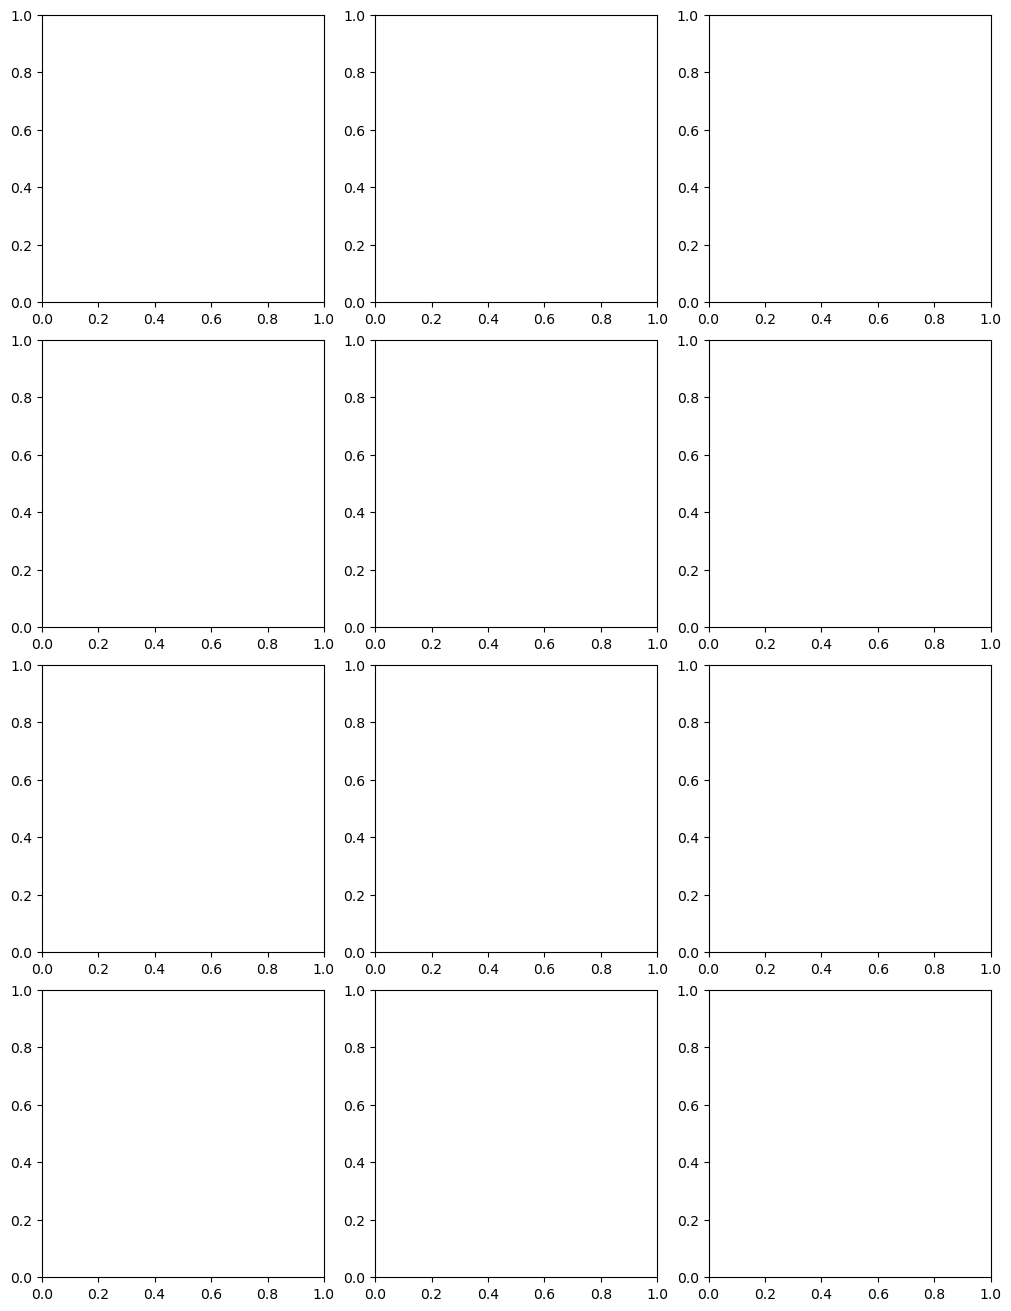

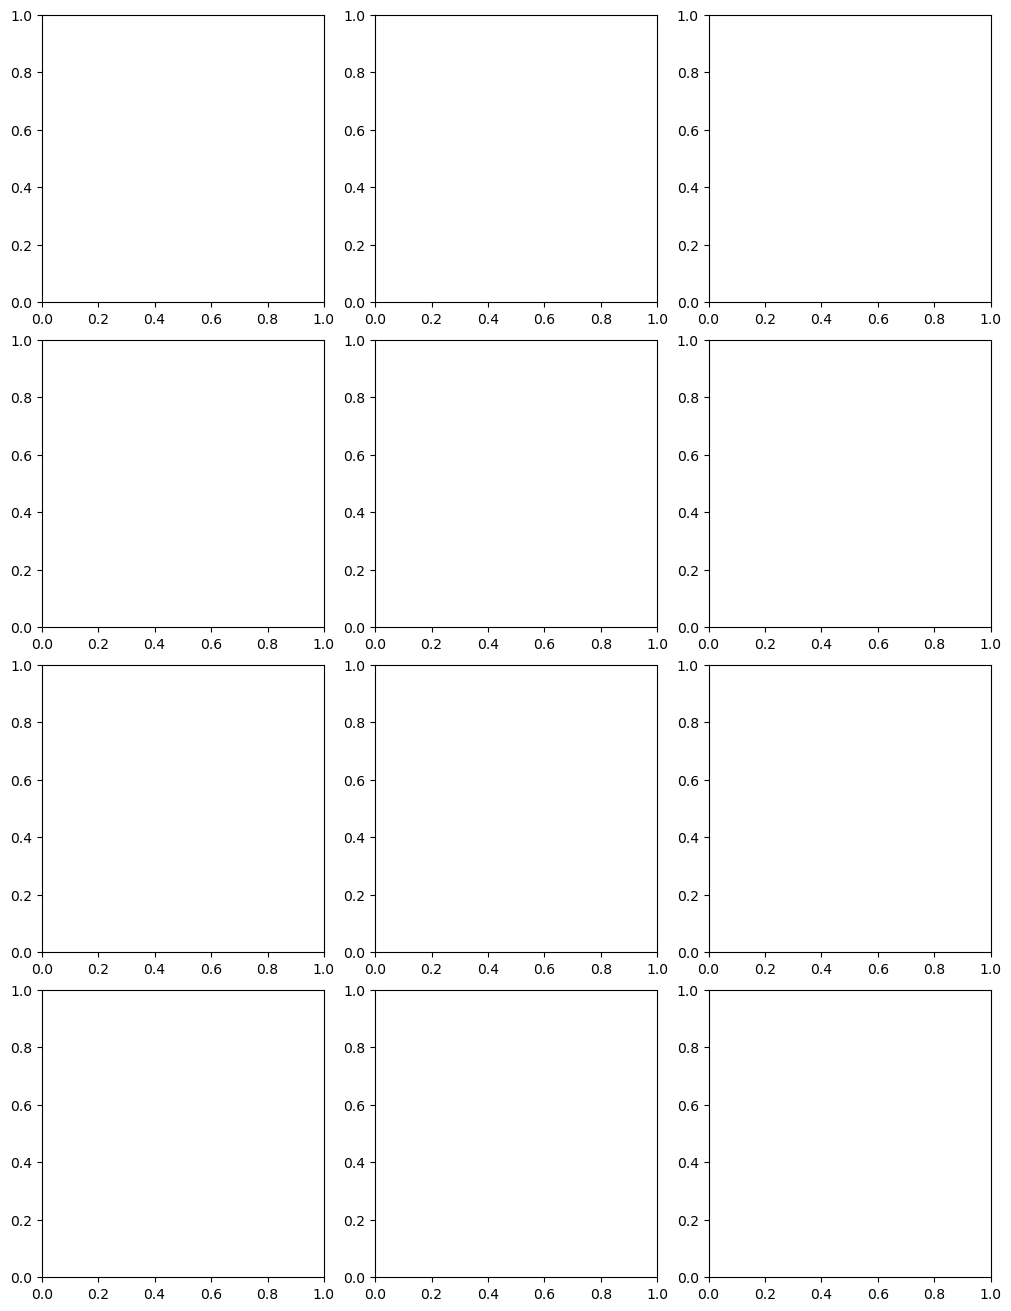

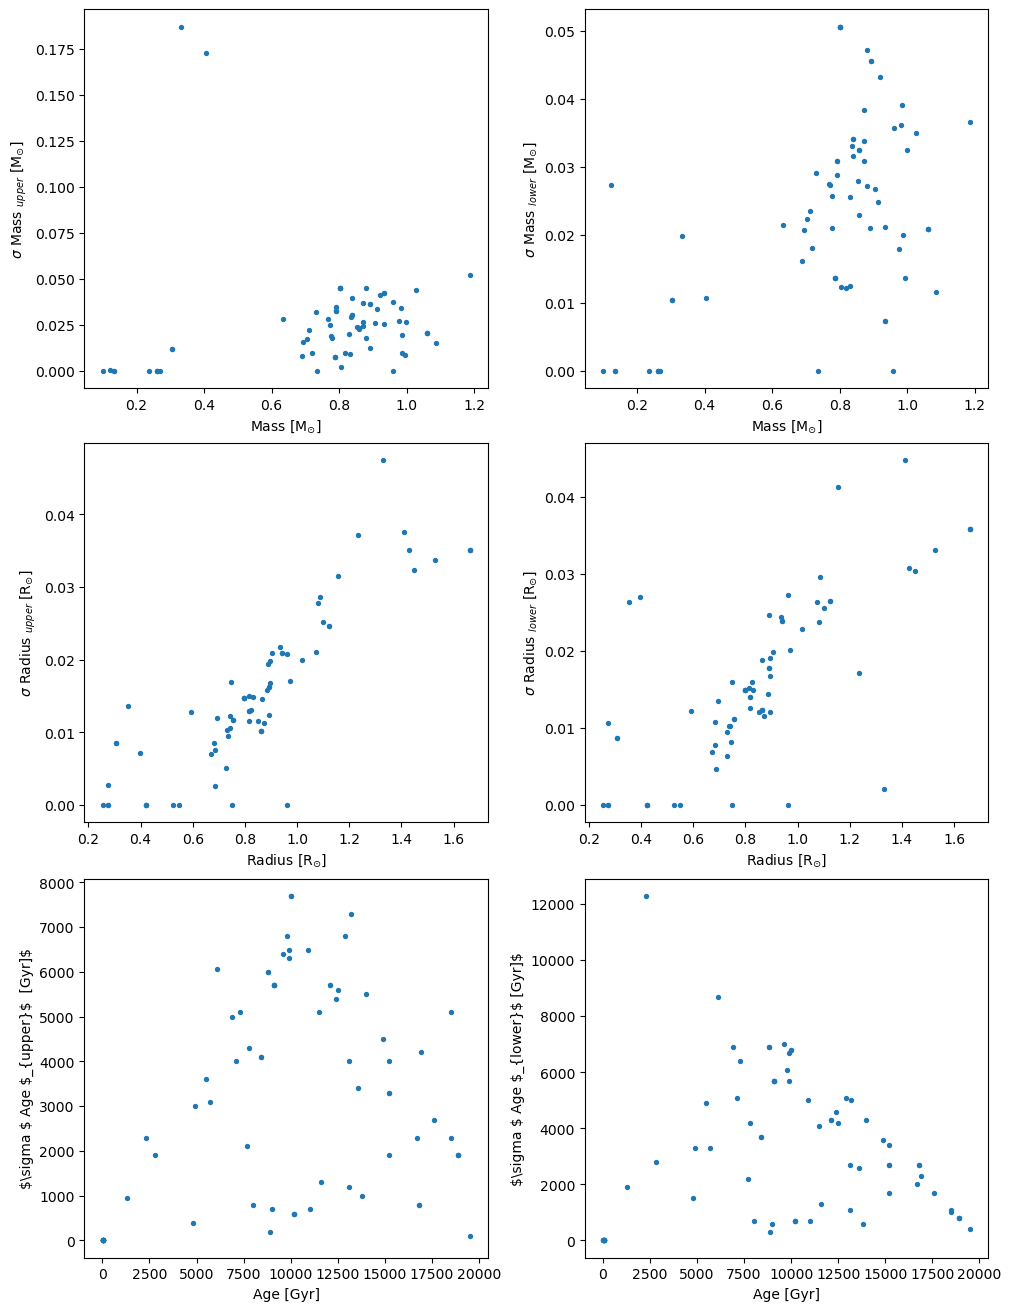

In [14]:
fig, axs = plt.subplots(ncols=2,nrows=3, figsize=(10,13), layout='constrained')

axs[0,0].scatter(full_analysis['massfin'],full_analysis['massfin_errp'],s=8 )
axs[0,1].scatter(full_analysis['massfin'],full_analysis['massfin_errm'],s=8 )
axs[0,0].set_xlabel(r'Mass [M$_{\odot}]$')
axs[0,1].set_xlabel(r'Mass [M$_{\odot}]$')
axs[0,0].set_ylabel(r'$\sigma $ Mass $_{upper}$ [M$_{\odot}]$')
axs[0,1].set_ylabel(r'$\sigma $ Mass $_{lower}$ [M$_{\odot}]$')

axs[1,0].scatter(full_analysis['radPhot'],full_analysis['radPhot_errp'],s=8)
axs[1,1].scatter(full_analysis['radPhot'],full_analysis['radPhot_errm'],s=8)
axs[1,0].set_xlabel(r'Radius [R$_{\odot}]$')
axs[1,1].set_xlabel(r'Radius [R$_{\odot}]$')
axs[1,0].set_ylabel(r'$\sigma $ Radius $_{upper}$ [R$_{\odot}]$')
axs[1,1].set_ylabel(r'$\sigma $ Radius $_{lower}$ [R$_{\odot}]$')

axs[2,0].scatter(full_analysis['age'],full_analysis['age_errp'],s=8 )
axs[2,1].scatter(full_analysis['age'],full_analysis['age_errm'],s=8 )
axs[2,0].set_xlabel(r'Age [Gyr]')
axs[2,1].set_xlabel(r'Age [Gyr]')
axs[2,0].set_ylabel(r'$\sigma $ Age $_{upper}$  [Gyr]$')
axs[2,1].set_ylabel(r'$\sigma $ Age $_{lower}$ [Gyr]$')


plt.show()

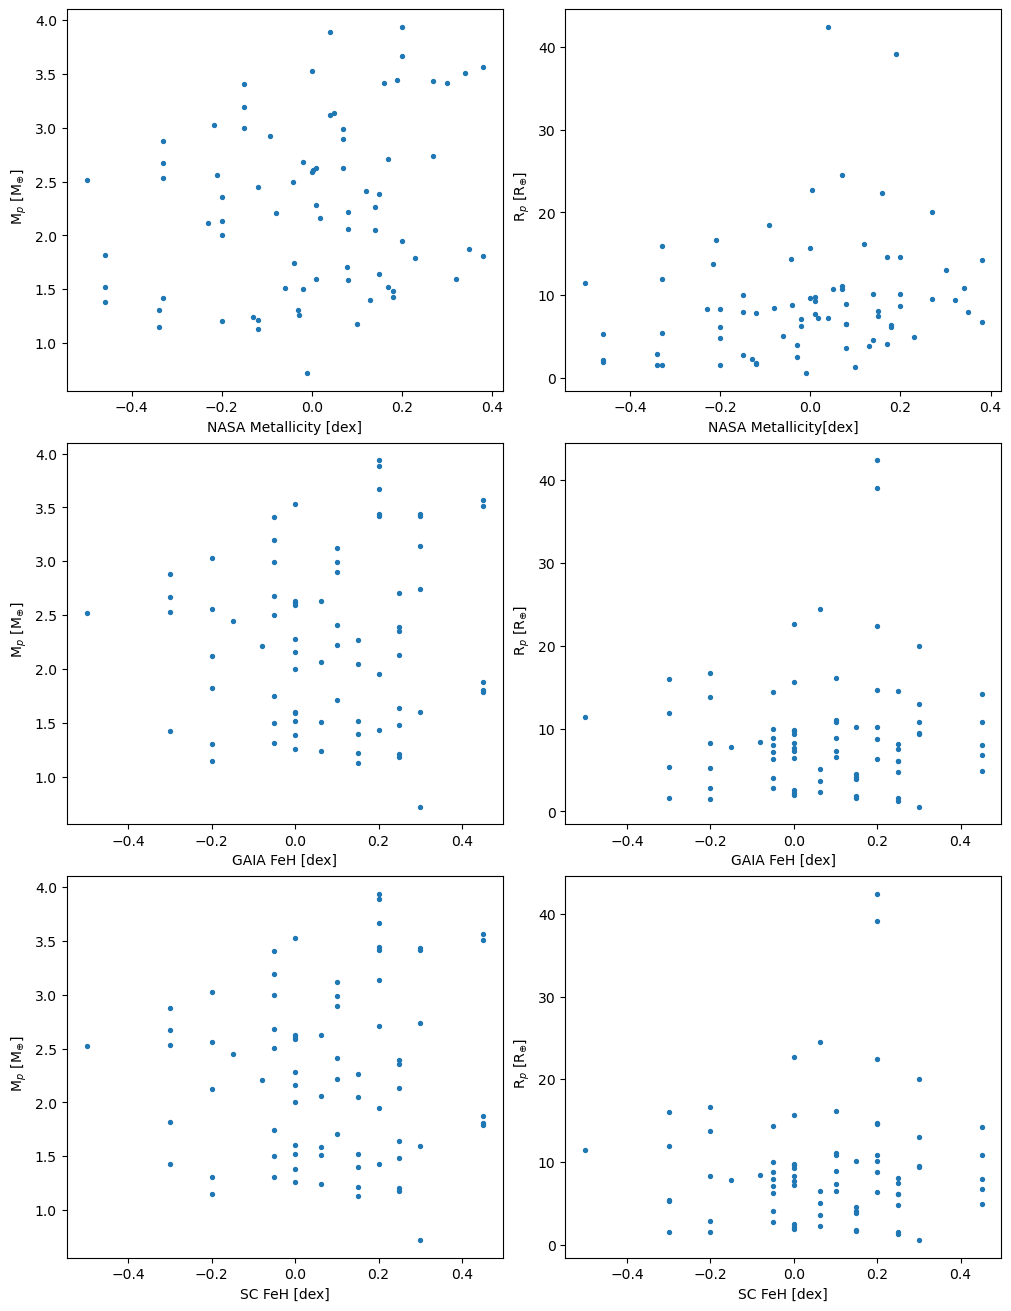

In [15]:
ig, axs = plt.subplots(ncols=2,nrows=3, figsize=(10,13), layout='constrained')

axs[0,0].scatter(full_analysis['st_met'],full_analysis['pl_rade'],s=8 )
axs[0,1].scatter(full_analysis['st_met'],full_analysis['pl_bmasse'],s=8 )
axs[0,0].set_xlabel(r'NASA Metallicity [dex]')
axs[0,1].set_xlabel(r'NASA Metallicity[dex]')
axs[0,0].set_ylabel(r'  M$_p$ [M$_{\oplus}]$')
axs[0,1].set_ylabel(r'  R$_p$ [R$_{\oplus}]$')

axs[1,0].scatter(full_analysis['FeH_gaia'],full_analysis['pl_rade'],s=8)
axs[1,1].scatter(full_analysis['FeH_gaia'],full_analysis['pl_bmasse'],s=8)
axs[1,0].set_xlabel(r'GAIA FeH [dex]')
axs[1,1].set_xlabel(r'GAIA FeH [dex]')
axs[1,0].set_ylabel(r'  M$_p$ [M$_{\oplus}]$')
axs[1,1].set_ylabel(r'  R$_p$ [R$_{\oplus}]$')

axs[2,0].scatter(full_analysis['FeH'],full_analysis['pl_rade'],s=8 )
axs[2,1].scatter(full_analysis['FeH'],full_analysis['pl_bmasse'],s=8 )
axs[2,0].set_xlabel(r'SC FeH [dex]')
axs[2,1].set_xlabel(r'SC FeH [dex]')
axs[2,0].set_ylabel(r'  M$_p$ [M$_{\oplus}]$')
axs[2,1].set_ylabel(r'  R$_p$ [R$_{\oplus}]$')


plt.show()

In [16]:
import planet_utils as plu
rp_new = plu.new_r(full_analysis, 'radPhot')
import astropy.constants as ca
re = ca.R_earth.value
rj = ca.R_jup.value
rp_new = np.array((rp_new * rj) / re)


mp_new = plu.planet_mass(full_analysis, 'massfin')
rhop_new = mp_new / ( (4/3)*np.pi*(rp_new)**2)

full_analysis['rp_new'] = rp_new
full_analysis['mp_new'] = mp_new
full_analysis['rhop_new'] = rhop_new

<ipython-input-16-460e4b49061a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis['rp_new'] = rp_new
<ipython-input-16-460e4b49061a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis['mp_new'] = mp_new
<ipython-input-16-460e4b49061a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

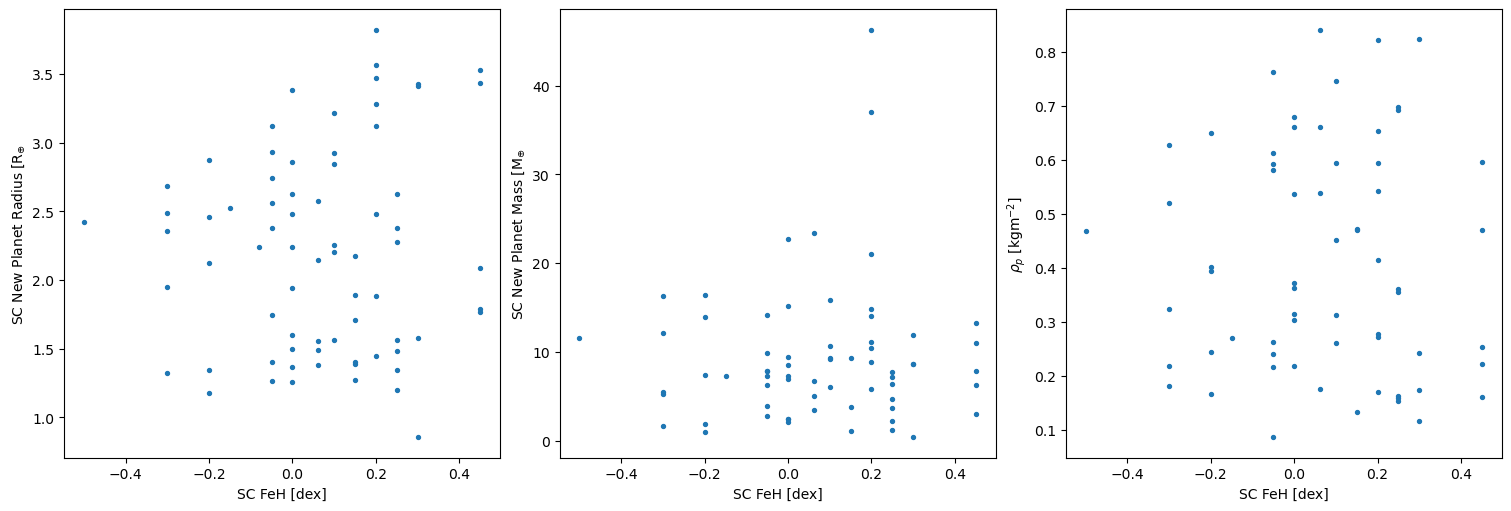

In [17]:
fig, axs = plt.subplots(ncols=3,nrows=1, figsize=(15,5), layout='constrained')

axs[0].scatter(full_analysis['FeH'],rp_new,s=8 )
axs[1].scatter(full_analysis['FeH'],mp_new,s=8 )
axs[0].set_xlabel(r'SC FeH [dex]')
axs[1].set_xlabel(r'SC FeH [dex]')
axs[0].set_ylabel(r'SC New Planet Radius [R$_{\oplus}$')
axs[1].set_ylabel(r'SC New Planet Mass [M$_{\oplus}$')

axs[2].scatter(full_analysis['FeH'], rhop_new, s=8)
axs[2].set_xlabel(r'SC FeH [dex]')
axs[2].set_ylabel(r'$\rho_p$ [kgm$^{-2}$]')
plt.show()



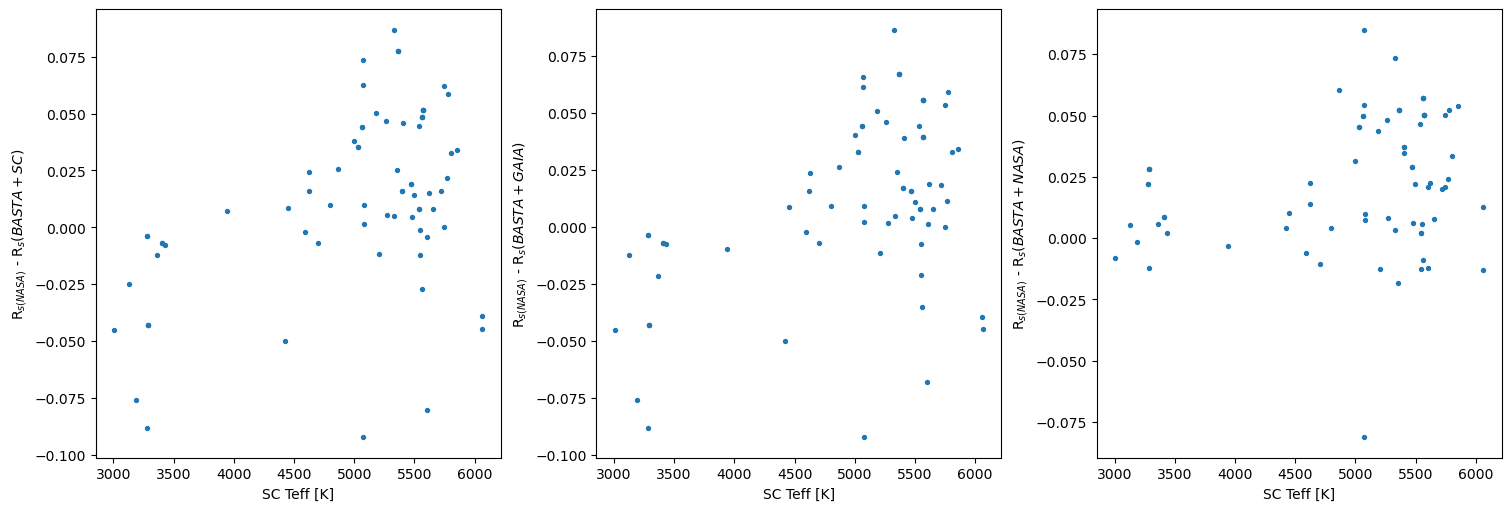

In [18]:
fig, axs = plt.subplots(ncols=3,nrows=1, figsize=(15,5), layout='constrained')


#axs[0].scatter(full_analysis['st_teff'],full_analysis['st_rad']-full_analysis['radPhot'],s=8 )
axs[0].scatter(full_analysis['Teff'],full_analysis['st_rad']-full_analysis['radPhot'],s=8 )
axs[0].set_xlabel(r'SC Teff [K]')
axs[0].set_ylabel(r'R$_{s(NASA)}$ - R$_s{(BASTA+SC)}$')

axs[1].scatter(full_analysis['Teff'],full_analysis['st_rad']-full_analysis['radPhot_gaia'],s=8 )
axs[1].set_xlabel(r'SC Teff [K]')
axs[1].set_ylabel(r'R$_{s(NASA)}$ - R$_s{(BASTA+GAIA)}$')


axs[2].scatter(full_analysis['Teff'],full_analysis['st_rad']-full_analysis['radPhot_nasa'],s=8 )
axs[2].set_xlabel(r'SC Teff [K]')
axs[2].set_ylabel(r'R$_{s(NASA)}$ - R$_s{(BASTA+NASA)}$')
plt.show()

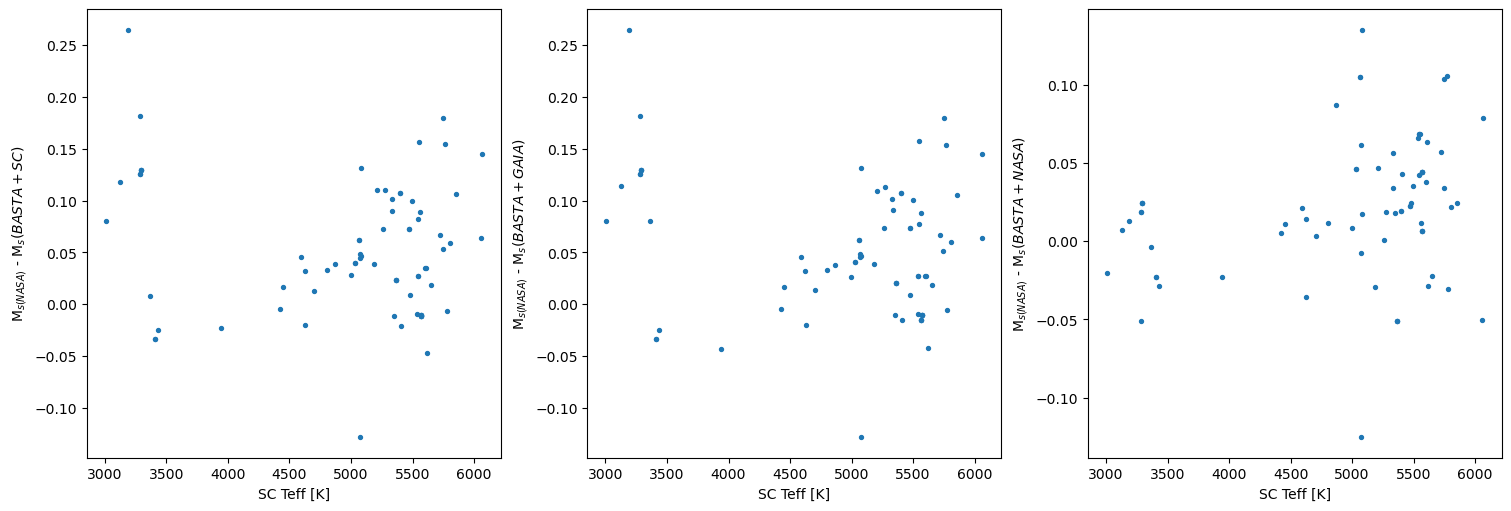

In [19]:
fig, axs = plt.subplots(ncols=3,nrows=1, figsize=(15,5), layout='constrained')

param=full_analysis['Teff']

axs[0].scatter(param,full_analysis['st_mass']-full_analysis['massfin'],s=8 )
axs[0].set_xlabel(r'SC Teff [K]')
axs[0].set_ylabel(r'M$_{s(NASA)}$ - M$_s{(BASTA+SC)}$')

axs[1].scatter(param,full_analysis['st_mass']-full_analysis['massfin_gaia'],s=8 )
axs[1].set_xlabel(r'SC Teff [K]')
axs[1].set_ylabel(r'M$_{s(NASA)}$ - M$_s{(BASTA+GAIA)}$')


axs[2].scatter(param,full_analysis['st_mass']-full_analysis['massfin_nasa'],s=8 )
axs[2].set_xlabel(r'SC Teff [K]')
axs[2].set_ylabel(r'M$_{s(NASA)}$ - M$_s{(BASTA+NASA)}$')
plt.show()

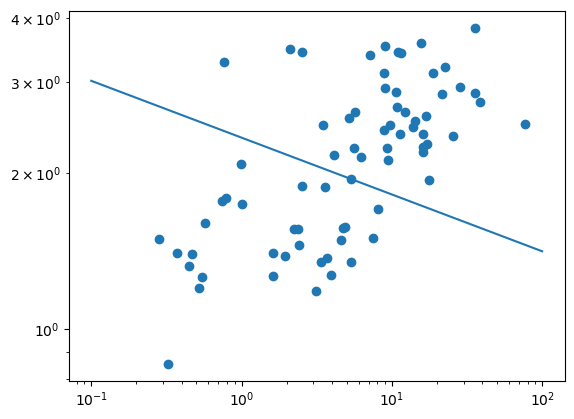

In [20]:
period_grad = -0.11
period_intercept = 0.37
x = np.linspace(0.1,100,1000)
y = 10**(period_grad*np.log10(x) + period_intercept)

plt.scatter(full_analysis['pl_orbper'], full_analysis['rp_new'])
plt.plot(x, y, label = 'Ho 22 valley')
plt.yscale('log')
plt.xscale('log')
plt.show()

<ipython-input-21-dddbed8f5c36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis['X'] = XYZ[:,0]

<ipython-input-21-dddbed8f5c36>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis['Y'] = XYZ[:,1]

<ipython-input-21-dddbed8f5c36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

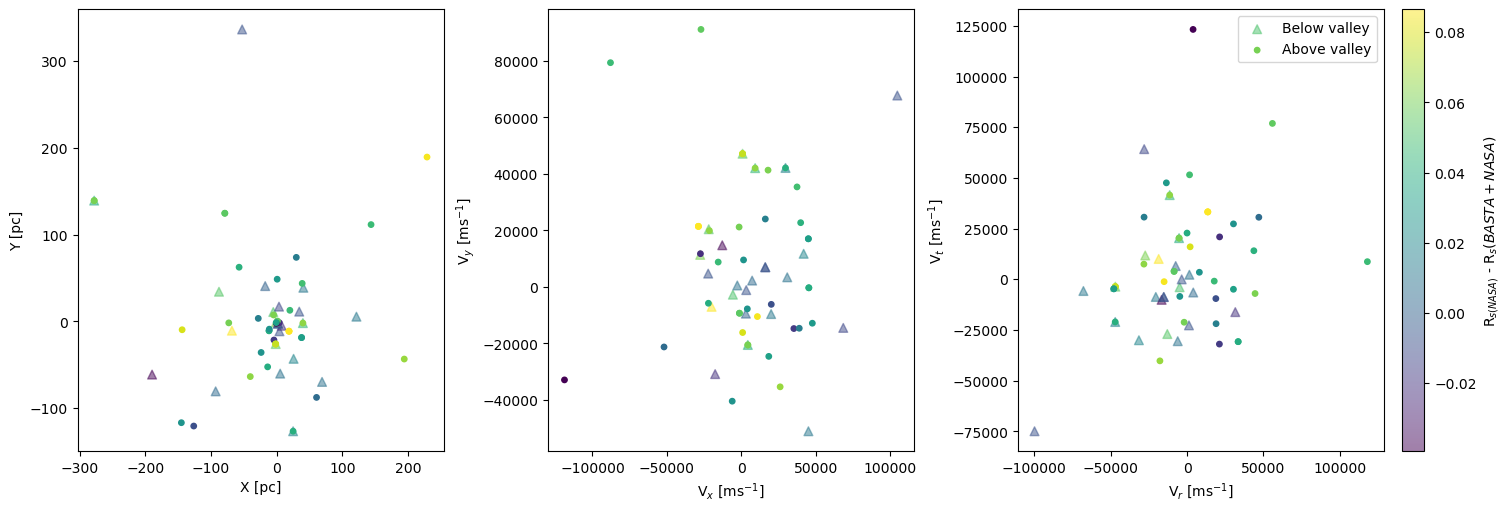

In [21]:
import galpy.util.coords as c

XYZ = c.lbd_to_XYZ(full_analysis['l'], full_analysis['b'],full_analysis['distance_gaia'])

full_analysis['X'] = XYZ[:,0]
full_analysis['Y'] = XYZ[:,1]
full_analysis['Z'] = XYZ[:,2]


vrpmllpmbb = c.pmrapmdec_to_pmllpmbb(full_analysis['pmra'], full_analysis['pmdec'], full_analysis['ra_2_phs_gaia'], full_analysis['dec_2_phs_gaia'], degree=True)

vxvyvz = c.vrpmllpmbb_to_vxvyvz(full_analysis['radial_velocity'],vrpmllpmbb[:,0], vrpmllpmbb[:,1], full_analysis['l'], full_analysis['b'], full_analysis['distance'])

full_analysis['vx'] = vxvyvz[:,0]
full_analysis['vy'] = vxvyvz[:,1]
full_analysis['vz'] = vxvyvz[:,2]

vrvtvz = c.vxvyvz_to_galcencyl(vxvyvz[:,0],vxvyvz[:,1],vxvyvz[:,2], XYZ[:,0], XYZ[:,1], XYZ[:,2])
print(max(full_analysis['distance_gaia']))

full_analysis['vr'] = vrvtvz[:,0]
full_analysis['vt'] = vrvtvz[:,1]

fig, axs = plt.subplots(ncols=3,nrows=1, figsize=(15,5), layout='constrained')




df_below = full_analysis[full_analysis['rp_new']<= (10 ** (period_grad * np.log10(full_analysis['pl_orbper']) + period_intercept))]
df_above = full_analysis[full_analysis['rp_new']> (10 ** (period_grad * np.log10(full_analysis['pl_orbper']) + period_intercept))]

print(len(df_above))


axs[0].scatter(df_below['X'], df_below['Y'], c=df_below['st_rad']-df_below['radPhot_gaia'], marker='^', s=40, label = 'Below valley', alpha=0.5)
axs[0].scatter(df_above['X'], df_above['Y'], c=df_above['st_rad']-df_above['radPhot_gaia'], marker='o', s=15, label = 'Above valley')
axs[0].set_xlabel('X [pc]')
axs[0].set_ylabel('Y [pc]')
axs[0]


axs[1].scatter(df_below['vx'], df_below['vy'], c=df_below['st_rad']-df_below['radPhot_gaia'], marker='^', s=40, label = 'Below valley', alpha=0.5)
axs[1].scatter(df_above['vx'], df_above['vy'], c=df_above['st_rad']-df_above['radPhot_gaia'], marker='o',  s=15, label = 'Above valley')

axs[1].set_xlabel('V$_x$ [ms$^{-1}]$')
axs[1].set_ylabel('V$_y$ [ms$^{-1}]$')

b = axs[2].scatter(df_below['vr'], df_below['vt'], c=df_below['st_rad']-df_below['radPhot_gaia'], marker='^', s=40, label = 'Below valley', alpha=0.5)
axs[2].scatter(df_above['vr'], df_above['vt'], c=df_above['st_rad']-df_above['radPhot_gaia'], marker='o',s=15, label = 'Above valley')
axs[2].legend()
plt.colorbar(b, ax=axs[2], label=r'R$_{s(NASA)}$ - R$_s{(BASTA+NASA)}$')

axs[2].set_xlabel('V$_r$ [ms$^{-1}]$')
axs[2].set_ylabel('V$_t$ [ms$^{-1}]$')

plt.show()

<ipython-input-22-3f75ff4bfc7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis['X'] = XYZ[:,0]

<ipython-input-22-3f75ff4bfc7d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_analysis['Y'] = XYZ[:,1]

<ipython-input-22-3f75ff4bfc7d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

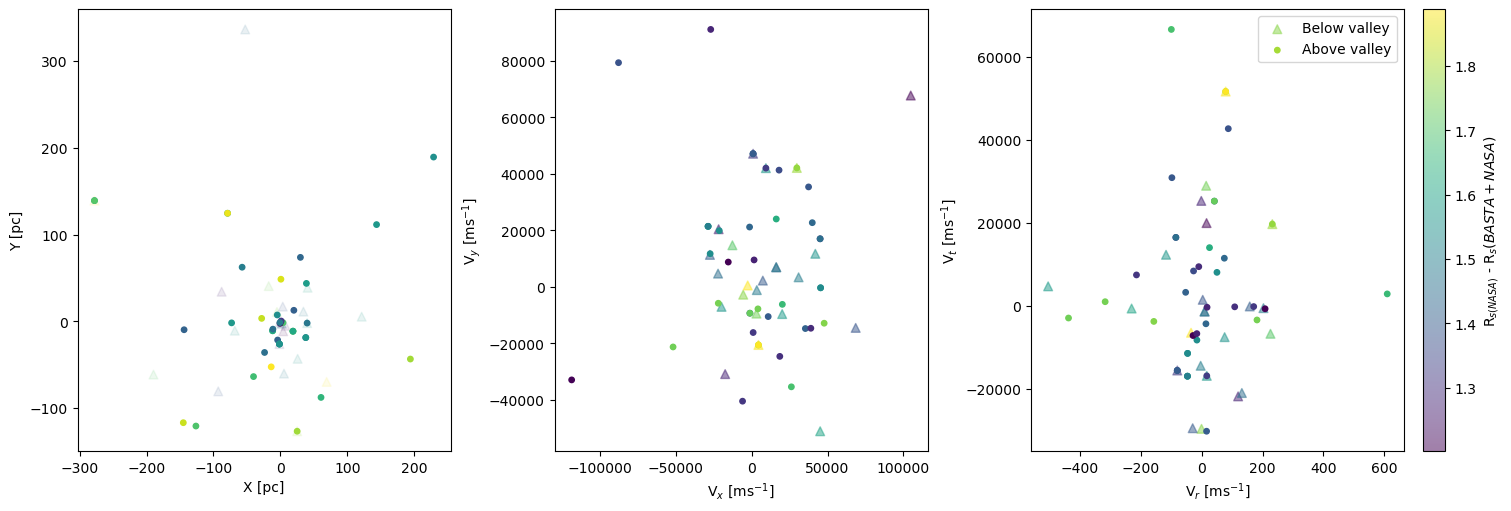

In [22]:

import galpy.util.coords as c

XYZ = c.lbd_to_XYZ(full_analysis['l'], full_analysis['b'],full_analysis['distance_gaia'])

full_analysis['X'] = XYZ[:,0]
full_analysis['Y'] = XYZ[:,1]
full_analysis['Y'] = XYZ[:,2]


vrpmllpmbb = c.pmrapmdec_to_pmllpmbb(full_analysis['pmra'], full_analysis['pmdec'], full_analysis['ra_2_phs_gaia'], full_analysis['dec_2_phs_gaia'], degree=True)

vxvyvz = c.vrpmllpmbb_to_vxvyvz(full_analysis['radial_velocity'],vrpmllpmbb[:,0], vrpmllpmbb[:,1], full_analysis['l'], full_analysis['b'], full_analysis['distance'])

full_analysis['vx'] = vxvyvz[:,0]
full_analysis['vy'] = vxvyvz[:,1]
full_analysis['vz'] = vxvyvz[:,2]

vrvtvz = c.vxvyvz_to_galcencyl(vxvyvz[:,0],vxvyvz[:,1],vxvyvz[:,2], XYZ[:,0], XYZ[:,1], XYZ[:,2])
print(max(full_analysis['distance_gaia']))

full_analysis['vr'] = vrvtvz[:,0]
full_analysis['vt'] = vrvtvz[:,1]

fig, axs = plt.subplots(ncols=3,nrows=1, figsize=(15,5), layout='constrained')

print(len(df_above))


axs[0].scatter(df_below['X'], df_below['Y'], c=df_below['rp_new'], marker='^', s=40, label = 'Below valley', alpha=0.1,)
axs[0].scatter(df_above['X'], df_above['Y'], c=df_above['rp_new']-df_above['radPhot_gaia'], marker='o', s=15, label = 'Above valley')
axs[0].set_xlabel('X [pc]')
axs[0].set_ylabel('Y [pc]')
axs[0]


axs[1].scatter(df_below['vx'], df_below['vy'], c=df_below['rp_new'], marker='^', s=40, label = 'Below valley', alpha=0.5)
axs[1].scatter(df_above['vx'], df_above['vy'], c=df_above['rp_new'], marker='o',  s=15, label = 'Above valley')

axs[1].set_xlabel('V$_x$ [ms$^{-1}]$')
axs[1].set_ylabel('V$_y$ [ms$^{-1}]$')

b = axs[2].scatter(df_below['Z'], df_below['vz'], c=df_below['rp_new'], marker='^', s=40, label = 'Below valley', alpha=0.5)
axs[2].scatter(df_above['Z'], df_above['vz'], c=df_above['rp_new'], marker='o',s=15, label = 'Above valley')
axs[2].legend()
plt.colorbar(b, ax=axs[2], label=r'R$_{s(NASA)}$ - R$_s{(BASTA+NASA)}$')

axs[2].set_xlabel('V$_r$ [ms$^{-1}]$')
axs[2].set_ylabel('V$_t$ [ms$^{-1}]$')

plt.show()

In [23]:


from astropy.io import fits

In [101]:
c55 =  fits.open('/Users/afw2/Desktop/archive/AMBER.2004-03-16T12:09:08.878.fits')

In [59]:
c55.info()

Filename: /Users/afw2/Desktop/archive/AMBER.2004-03-16T12:09:08.878.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     400   ()      
  1  IMAGING_DATA    1 BinTableHDU     40   10R x 7C   [D, 10240E, 16384E, 16384E, 16384E, 16384E, 3I]   
  2  IMAGING_DETECTOR    1 BinTableHDU     45   5R x 11C   [I, I, 3I, I, 16A, 2I, E, 2I, 2D, 2E, 8A]   
  3  AMBER_WAVEDATA    1 BinTableHDU     19   1R x 2C   [512E, 512E]   


In [60]:
c55[1].columns

ColDefs(
    name = 'TIME'; format = 'D'
    name = 'DATA1'; format = '10240E'; dim = '(20,512)'
    name = 'DATA2'; format = '16384E'; dim = '(32,512)'
    name = 'DATA3'; format = '16384E'; dim = '(32,512)'
    name = 'DATA4'; format = '16384E'; dim = '(32,512)'
    name = 'DATA5'; format = '16384E'; dim = '(32,512)'
    name = 'OPT_TRAIN'; format = '3I'
)

In [77]:
c55[1].columns.info()

name:
    ['TIME', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'OPT_TRAIN']
format:
    ['D', '10240E', '16384E', '16384E', '16384E', '16384E', '3I']
unit:
    ['', '', '', '', '', '', '']
null:
    ['', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '']
dim:
    ['', '(20,512)', '(32,512)', '(32,512)', '(32,512)', '(32,512)', '']
coord_type:
    ['', '', '', '', '', '', '']
coord_unit:
    ['', '', '', '', '', '', '']
coord_ref_point:
    ['', '', '', '', '', '', '']
coord_ref_value:
    ['', '', '', '', '', '', '']
coord_inc:
    ['', '', '', '', '', '', '']
time_ref_pos:
    ['', '', '', '', '', '', '']


In [78]:
d = c55[1].data
a = c55[1].columns
a.names

['TIME', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'OPT_TRAIN']

In [86]:
d['DATA1'][0][0]

array([   1.,  -56.,  -80.,  -58.,  -76., -101.,  -74.,  -69.,  -15.,
        -43.,  -54.,  -48.,  -31.,  -68.,  -65.,  -59.,  -80.,  -85.,
        -51.,  -20.], dtype=float32)

In [91]:
plt.scatter(d['TIME'],d['DATA1'][4][2])
plt.show()

ValueError: x and y must be the same size